<h1 style="text-align: center; color: white"> Plotting cross section ratios as a function of Bjorken-x </h1>

<h2 style="text-align: center; color: orange"> For 26 deg </h2>

In [24]:
import uproot, time, sys
start_time = time.time()
sys.path.append('/Users/AbSir/Library/CloudStorage/GoogleDrive-asharda@vols.utk.edu/My Drive/xem2')
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy import stats
from common_functions import read_report, ImportRadcor, target_info, root_hist_to_numpy, csb, jra_nprat, datahist_from_array, mchist_from_array, cereff, baja, E, leaky_cauldron
from common_functions import LD2_dict, C12_dict, Dummy_dict, Fe54_dict, Ca40_dict, Be9_dict, Ca48_dict, B10_dict, B11_dict, He4_dict, He3_dict, C12_dict_l2, delta_correction
from common_functions import Sn119_dict, Ti48_dict, Ag108_dict, Th232_dict, Ni58_dict, Ni64_dict, Li7_dict, Li6_dict, Al27_dict, Cu63_dict, Au197_dict, cafe_report_path, tinfo_path
from common_functions import C12_26_dict, Dummy_26_dict, Ca40_26_dict, LD2_26_dict, LH2_26_dict, Ei, Mp, N_A, Q_E

\begin{equation}
    \sigma^{Born}_{data} = \frac{Y_{data}}{Y_{MC}} \cdot \sigma^{Born}_{MC}
\end{equation}

In [25]:
folder = 'chhabees'
leaky = 1
ntg = 'C12' # What is the nuclei in numerator?
nsimstring = ntg.lower()
print("nsimstring", nsimstring)
dtg = 'LD2' # What is the nuclei in denominator?
dsimstring = dtg.lower()
print("dsimstring", dsimstring)
ald = 'Dummy' # Aluminium dummy target
dang = 26.0 # What is your desired angle?
antg = ntg + '_' + str(int(dang))  # Angle string for numerator nuclei
adtg = dtg + '_' + str(int(dang))  # Angle string for denominator nuclei
dmom = [1.95, 2.21, 2.52, 2.86, 3.25, 3.69, 4.19, 4.767, 5.42] # What are your desired central momenta (just the magnitude)
bin_per_mom = 16 # How many bins per momentum?
bin_num = bin_per_mom * len(dmom) # Total number of bins in the combined histogram

# Kinematic variables
ts = dang # Spectrometer angle
Z, A = target_info[ntg][0], target_info[ntg][1]  # Target
thick = target_info[ntg][2] # g/cm2. From Cameron's target sheet column 'R'
ep_min = {}
ep_max = {}

# Constants
dpp_up, dpp_down = 10.0, -10.0 # Momentum acceptance upper and lower limit
cos_ts = np.cos(np.deg2rad(ts))
sin_ts = np.sin(np.deg2rad(ts))
print(antg)

for momentum in dmom:
    ep_min[momentum] = momentum * (1 + 0.01 * dpp_down)
    ep_max[momentum] = momentum * (1 + 0.01 * dpp_up)
    phi_up, phi_down, theta_up, theta_down = 100.0, -100.0, 65.0, -65.0 # mrad
    domega = (phi_up - phi_down) * (theta_up - theta_down) / 1e6  # diff solid angle in sr
    sim_charge = 1.
    lumin = thick * sim_charge / A * N_A / Q_E * 1e-39

nsimstring c12
dsimstring ld2
C12_26


<h1 align="center">DATA WORK FOR NTG</h1>

In [26]:
target_dict_name = f'{antg}_dict'
target_dict = globals()[target_dict_name]
delta_hist = {}
theta_dict = {}
eff_weight = {}
data_delta = np.linspace(-8.0, 8.0, bin_per_mom + 1)

for momentum in dmom:
    files = [f'/Volumes/smriti/xem2/ROOTfiles/HMS_{run}_skim.root' for run in target_dict[momentum]]
    branches = ['H_gtr_dp', 'H_cal_etottracknorm', 'H_gtr_ph', 'H_gtr_th', 'H_cer_npeSum', 'H_bcm_CurrentFlag']
    electrons = uproot.concatenate(files, branches)

    data_cut = (np.abs(electrons['H_gtr_dp']) < 8) & (electrons['H_cal_etottracknorm'] > 0.7) & (np.abs(electrons['H_gtr_ph']) < 0.032) & (np.abs(electrons['H_gtr_th']) < 0.085) & (electrons['H_cer_npeSum'] > 2) & (electrons['H_bcm_CurrentFlag'] == 1)
    dp_cut = electrons['H_gtr_dp'][data_cut]
    theta_cut = electrons['H_gtr_th'][data_cut]
    phi_cut = electrons['H_gtr_ph'][data_cut]

    # Cherenkov efficiency correction
    eff_weight[momentum] = 1 / cereff(dp_cut)

    theta_dict[momentum] = np.rad2deg(np.arccos((cos_ts + phi_cut * sin_ts) / np.sqrt(1 + theta_cut * theta_cut + phi_cut * phi_cut)))
    delta_hist[momentum] = np.array(dp_cut)

Mean scaling factor for C12_26 at 1.95 GeV/c is 5.846145010748447e-05
Total scaling factor for C12_26 at 1.95 GeV/c is 376316.358207876
Scaling factor for C12_26 at 1.95 GeV/c is 2.6573386412492948e-06
Counts for C12_26 at 1.95 GeV is 228491.09465678272
Mean scaling factor for C12_26 at 2.21 GeV/c is 8.365113114979837e-05
Total scaling factor for C12_26 at 2.21 GeV/c is 23908.821943106752
Scaling factor for C12_26 at 2.21 GeV/c is 4.1825565574899184e-05
Counts for C12_26 at 2.21 GeV is 12519.511707023797
Mean scaling factor for C12_26 at 2.52 GeV/c is 5.9871040348673556e-05
Total scaling factor for C12_26 at 2.52 GeV/c is 33405.13190271146
Scaling factor for C12_26 at 2.52 GeV/c is 2.9935520174336778e-05
Counts for C12_26 at 2.52 GeV is 15049.029417649657
Mean scaling factor for C12_26 at 2.86 GeV/c is 3.694483149268122e-05
Total scaling factor for C12_26 at 2.86 GeV/c is 81202.15680491873
Scaling factor for C12_26 at 2.86 GeV/c is 1.231494383089374e-05
Counts for C12_26 at 2.86 GeV is

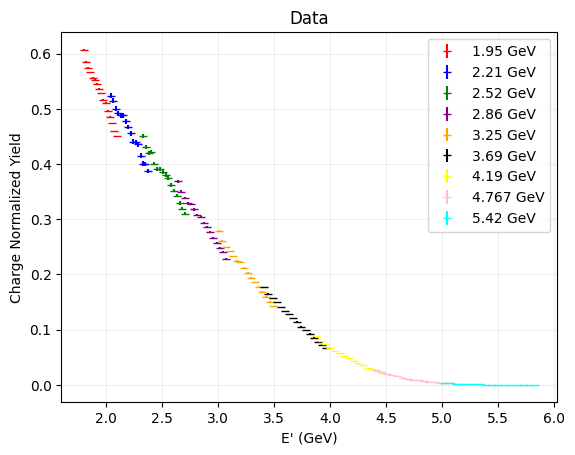

In [27]:
# Calculate the charge normalized yield and the uncertainty per bin
delta_bin_contents_1p95_ntg, delta_bin_errors_1p95_ntg = datahist_from_array(delta_hist[1.95], 1.95, data_delta, antg, eff_weight[1.95])
delta_bin_contents_2p21_ntg, delta_bin_errors_2p21_ntg = datahist_from_array(delta_hist[2.21], 2.21, data_delta, antg, eff_weight[2.21])
delta_bin_contents_2p52_ntg, delta_bin_errors_2p52_ntg = datahist_from_array(delta_hist[2.52], 2.52, data_delta, antg, eff_weight[2.52])
delta_bin_contents_2p86_ntg, delta_bin_errors_2p86_ntg = datahist_from_array(delta_hist[2.86], 2.86, data_delta, antg, eff_weight[2.86])
delta_bin_contents_3p25_ntg, delta_bin_errors_3p25_ntg = datahist_from_array(delta_hist[3.25], 3.25, data_delta, antg, eff_weight[3.25])
delta_bin_contents_3p69_ntg, delta_bin_errors_3p69_ntg = datahist_from_array(delta_hist[3.69], 3.69, data_delta, antg, eff_weight[3.69])
delta_bin_contents_4p19_ntg, delta_bin_errors_4p19_ntg = datahist_from_array(delta_hist[4.19], 4.19, data_delta, antg, eff_weight[4.19])
delta_bin_contents_4p767_ntg, delta_bin_errors_4p767_ntg = datahist_from_array(delta_hist[4.767], 4.767, data_delta, antg, eff_weight[4.767])
delta_bin_contents_5p42_ntg, delta_bin_errors_5p42_ntg = datahist_from_array(delta_hist[5.42], 5.42, data_delta, antg, eff_weight[5.42])

# Update the histogram and bin edges
_, delta_bin_edges_1p95 = np.histogram(delta_hist[1.95], bins=data_delta)
_, delta_bin_edges_2p21 = np.histogram(delta_hist[2.21], bins=data_delta)
_, delta_bin_edges_2p52 = np.histogram(delta_hist[2.52], bins=data_delta)
_, delta_bin_edges_2p86 = np.histogram(delta_hist[2.86], bins=data_delta)
_, delta_bin_edges_3p25 = np.histogram(delta_hist[3.25], bins=data_delta)
_, delta_bin_edges_3p69 = np.histogram(delta_hist[3.69], bins=data_delta)
_, delta_bin_edges_4p19 = np.histogram(delta_hist[4.19], bins=data_delta)
_, delta_bin_edges_4p767 = np.histogram(delta_hist[4.767], bins=data_delta)
_, delta_bin_edges_5p42 = np.histogram(delta_hist[5.42], bins=data_delta)

# Calculate bin centers
delta_bin_centers_1p95 = (delta_bin_edges_1p95[:-1] + delta_bin_edges_1p95[1:]) / 2
delta_bin_centers_2p21 = (delta_bin_edges_2p21[:-1] + delta_bin_edges_2p21[1:]) / 2
delta_bin_centers_2p52 = (delta_bin_edges_2p52[:-1] + delta_bin_edges_2p52[1:]) / 2
delta_bin_centers_2p86 = (delta_bin_edges_2p86[:-1] + delta_bin_edges_2p86[1:]) / 2
delta_bin_centers_3p25 = (delta_bin_edges_3p25[:-1] + delta_bin_edges_3p25[1:]) / 2
delta_bin_centers_3p69 = (delta_bin_edges_3p69[:-1] + delta_bin_edges_3p69[1:]) / 2
delta_bin_centers_4p19 = (delta_bin_edges_4p19[:-1] + delta_bin_edges_4p19[1:]) / 2
delta_bin_centers_4p767 = (delta_bin_edges_4p767[:-1] + delta_bin_edges_4p767[1:]) / 2
delta_bin_centers_5p42 = (delta_bin_edges_5p42[:-1] + delta_bin_edges_5p42[1:]) / 2

# Update binned eprime bin centers
binned_eprime_bin_centers_1p95 = 1.95 * (1 + 0.01 * delta_bin_centers_1p95)
binned_eprime_bin_centers_2p21 = 2.21 * (1 + 0.01 * delta_bin_centers_2p21)
binned_eprime_bin_centers_2p52 = 2.52 * (1 + 0.01 * delta_bin_centers_2p52)
binned_eprime_bin_centers_2p86 = 2.86 * (1 + 0.01 * delta_bin_centers_2p86)
binned_eprime_bin_centers_3p25 = 3.25 * (1 + 0.01 * delta_bin_centers_3p25)
binned_eprime_bin_centers_3p69 = 3.69 * (1 + 0.01 * delta_bin_centers_3p69)
binned_eprime_bin_centers_4p19 = 4.19 * (1 + 0.01 * delta_bin_centers_4p19)
binned_eprime_bin_centers_4p767 = 4.767 * (1 + 0.01 * delta_bin_centers_4p767)
binned_eprime_bin_centers_5p42 = 5.42 * (1 + 0.01 * delta_bin_centers_5p42)

# Calculate the charge symmetric background fraction per bin
csb_frac_1p95_ntg = csb(binned_eprime_bin_centers_1p95, ntg, dang)
csb_frac_2p21_ntg = csb(binned_eprime_bin_centers_2p21, ntg, dang)
csb_frac_2p52_ntg = csb(binned_eprime_bin_centers_2p52, ntg, dang)
csb_frac_2p86_ntg = csb(binned_eprime_bin_centers_2p86, ntg, dang)
csb_frac_3p25_ntg = csb(binned_eprime_bin_centers_3p25, ntg, dang)
csb_frac_3p69_ntg = csb(binned_eprime_bin_centers_3p69, ntg, dang)
csb_frac_4p19_ntg = csb(binned_eprime_bin_centers_4p19, ntg, dang)
csb_frac_4p767_ntg = csb(binned_eprime_bin_centers_4p767, ntg, dang)
csb_frac_5p42_ntg = csb(binned_eprime_bin_centers_5p42, ntg, dang)

# Subtract the charge symmetric background fraction from the total yield
subtracted_csb_contents_1p95_ntg = delta_bin_contents_1p95_ntg * (1 - csb_frac_1p95_ntg)
subtracted_csb_contents_2p21_ntg = delta_bin_contents_2p21_ntg * (1 - csb_frac_2p21_ntg)
subtracted_csb_contents_2p52_ntg = delta_bin_contents_2p52_ntg * (1 - csb_frac_2p52_ntg)
subtracted_csb_contents_2p86_ntg = delta_bin_contents_2p86_ntg * (1 - csb_frac_2p86_ntg)
subtracted_csb_contents_3p25_ntg = delta_bin_contents_3p25_ntg * (1 - csb_frac_3p25_ntg)
subtracted_csb_contents_3p69_ntg = delta_bin_contents_3p69_ntg * (1 - csb_frac_3p69_ntg)
subtracted_csb_contents_4p19_ntg = delta_bin_contents_4p19_ntg * (1 - csb_frac_4p19_ntg)
subtracted_csb_contents_4p767_ntg = delta_bin_contents_4p767_ntg * (1 - csb_frac_4p767_ntg)
subtracted_csb_contents_5p42_ntg = delta_bin_contents_5p42_ntg * (1 - csb_frac_5p42_ntg)

# Add the errors in quadrature
subtracted_csb_errors_1p95_ntg = delta_bin_errors_1p95_ntg * (1 - csb_frac_1p95_ntg)
subtracted_csb_errors_2p21_ntg = delta_bin_errors_2p21_ntg * (1 - csb_frac_2p21_ntg)
subtracted_csb_errors_2p52_ntg = delta_bin_errors_2p52_ntg * (1 - csb_frac_2p52_ntg)
subtracted_csb_errors_2p86_ntg = delta_bin_errors_2p86_ntg * (1 - csb_frac_2p86_ntg)
subtracted_csb_errors_3p25_ntg = delta_bin_errors_3p25_ntg * (1 - csb_frac_3p25_ntg)
subtracted_csb_errors_3p69_ntg = delta_bin_errors_3p69_ntg * (1 - csb_frac_3p69_ntg)
subtracted_csb_errors_4p19_ntg = delta_bin_errors_4p19_ntg * (1 - csb_frac_4p19_ntg)
subtracted_csb_errors_4p767_ntg = delta_bin_errors_4p767_ntg * (1 - csb_frac_4p767_ntg)
subtracted_csb_errors_5p42_ntg = delta_bin_errors_5p42_ntg * (1 - csb_frac_5p42_ntg)

# fig refers to the entire canvas on which plots are drawn. ax refers to a single plot/subplot
fig, ax = plt.subplots()
ax.errorbar(binned_eprime_bin_centers_1p95, delta_bin_contents_1p95_ntg, yerr=delta_bin_errors_1p95_ntg, fmt='_', color='red', label='1.95 GeV')
ax.errorbar(binned_eprime_bin_centers_2p21, delta_bin_contents_2p21_ntg, yerr=delta_bin_errors_2p21_ntg, fmt='_', color='blue', label='2.21 GeV')
ax.errorbar(binned_eprime_bin_centers_2p52, delta_bin_contents_2p52_ntg, yerr=delta_bin_errors_2p52_ntg, fmt='_', color='green', label='2.52 GeV')
ax.errorbar(binned_eprime_bin_centers_2p86, delta_bin_contents_2p86_ntg, yerr=delta_bin_errors_2p86_ntg, fmt='_', color='purple', label='2.86 GeV')
ax.errorbar(binned_eprime_bin_centers_3p25, delta_bin_contents_3p25_ntg, yerr=delta_bin_errors_3p25_ntg, fmt='_', color='orange', label='3.25 GeV')
ax.errorbar(binned_eprime_bin_centers_3p69, delta_bin_contents_3p69_ntg, yerr=delta_bin_errors_3p69_ntg, fmt='_', color='black', label='3.69 GeV')
ax.errorbar(binned_eprime_bin_centers_4p19, delta_bin_contents_4p19_ntg, yerr=delta_bin_errors_4p19_ntg, fmt='_', color='yellow', label='4.19 GeV')
ax.errorbar(binned_eprime_bin_centers_4p767, delta_bin_contents_4p767_ntg, yerr=delta_bin_errors_4p767_ntg, fmt='_', color='pink', label='4.767 GeV')
ax.errorbar(binned_eprime_bin_centers_5p42, delta_bin_contents_5p42_ntg, yerr=delta_bin_errors_5p42_ntg, fmt='_', color='cyan', label='5.42 GeV')
ax.set_ylabel('Charge Normalized Yield')
ax.set_xlabel('E\' (GeV)')
ax.set_title('Data')
ax.legend()
# ax.set_yscale('log')
ax.grid(alpha = 0.2)
# fig.savefig(f'{folder}/{nsimstring}_{dsimstring}_newyield.pdf')

Mean scaling factor for C12_26 at 2.21 GeV/c is 8.365113114979837e-05
Total scaling factor for C12_26 at 2.21 GeV/c is 23908.821943106752
Scaling factor for C12_26 at 2.21 GeV/c is 4.1825565574899184e-05
Mean scaling factor for C12_26 at 2.52 GeV/c is 5.9871040348673556e-05
Total scaling factor for C12_26 at 2.52 GeV/c is 33405.13190271146
Scaling factor for C12_26 at 2.52 GeV/c is 2.9935520174336778e-05


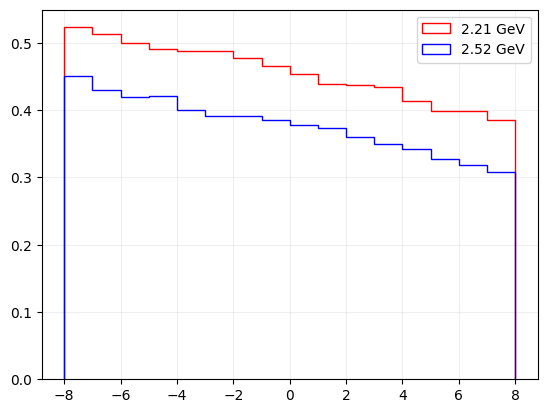

In [28]:
plt.hist(delta_hist[2.21], bins = data_delta, histtype = 'step', label = '2.21 GeV', color = 'red', weights = np.ones_like(delta_hist[2.21]) * read_report(2.21, antg))
plt.hist(delta_hist[2.52], bins = data_delta, histtype = 'step', label = '2.52 GeV', color = 'blue', weights = np.ones_like(delta_hist[2.52]) * read_report(2.52, antg))
# plt.hist(delta_hist[2.21], bins = data_delta, histtype = 'step', label = '2.21 GeV', color = 'red')
# plt.hist(delta_hist[2.52], bins = data_delta, histtype = 'step', label = '2.52 GeV', color = 'blue')
plt.legend()
plt.grid(alpha = 0.2)

<h1 align = 'center'> TARGET SPECIFIC DATA YIELD CORRECTION</h1>

In [29]:
if ntg == 'Ca48':
    print("Correcting for Ca40 contamination in Ca48 target")
    C = 0.113 # Ratio of Ca40 contamination in Ca48 target to Ca40 target
    cont_tg = 'Ca40'

elif ntg == 'B10':
    print("Correcting for C12 contamination in B10 target")
    C = 0.231 # Ratio of C12 contamination in B10 target to C12 target
    cont_tg = 'C12'

elif ntg == 'B11':
    print("Correcting for C12 contamination in B11 target")
    C = 0.236 # Ratio of C12 contamination in B11 target to C12 target
    cont_tg = 'C12'

elif ntg == 'He3' or ntg == 'LD2':
    print("Performing Aluminum cell wall subtraction")
    C = 0.2165 # Mean of Ratio of upstream & downstream dummy to target cell thickness
    acont_tg = ald + '_' + str(int(dang))
    
else:
    print("No contamination correction needed")
    C = 0

if C != 0:
    cont_dict_name = f'{acont_tg}_dict' # Dictionary containing the runs for the contaminant
    cont_dict = globals()[cont_dict_name]    
    for momentum in dmom:
        files = [f'/Volumes/smriti/xem2/ROOTfiles/HMS_{run}_skim.root' for run in cont_dict[momentum]]
        branches = ['H_gtr_dp', 'H_cal_etottracknorm', 'H_gtr_ph', 'H_gtr_th', 'H_cer_npeSum', 'H_bcm_CurrentFlag']
        electrons = uproot.concatenate(files, branches)

        data_cut = (np.abs(electrons['H_gtr_dp']) < 8) & (electrons['H_cal_etottracknorm'] > 0.7) & (np.abs(electrons['H_gtr_ph']) < 0.032) & (np.abs(electrons['H_gtr_th']) < 0.085) & (electrons['H_cer_npeSum'] > 2) & (electrons['H_bcm_CurrentFlag'] == 1)
        dp_cut = electrons['H_gtr_dp'][data_cut]
        theta_cut = electrons['H_gtr_th'][data_cut]
        phi_cut = electrons['H_gtr_ph'][data_cut]

        eff_weight[momentum] = 1 / cereff(dp_cut) # Cherenkov efficiency correction

        theta_dict[momentum] = np.rad2deg(np.arccos((cos_ts + phi_cut * sin_ts) / np.sqrt(1 + theta_cut * theta_cut + phi_cut * phi_cut)))
        delta_hist[momentum] = np.array(dp_cut)

    # Get yield and yield error from array
    contaminant_eprime_bin_contents_1p95, contaminant_eprime_bin_errors_1p95 = datahist_from_array(delta_hist[1.95], 1.95, data_delta, acont_tg, eff_weight[1.95])
    contaminant_eprime_bin_contents_2p21, contaminant_eprime_bin_errors_2p21 = datahist_from_array(delta_hist[2.21], 2.21, data_delta, acont_tg, eff_weight[2.21])
    contaminant_eprime_bin_contents_2p52, contaminant_eprime_bin_errors_2p52 = datahist_from_array(delta_hist[2.52], 2.52, data_delta, acont_tg, eff_weight[2.52])
    contaminant_eprime_bin_contents_2p86, contaminant_eprime_bin_errors_2p86 = datahist_from_array(delta_hist[2.86], 2.86, data_delta, acont_tg, eff_weight[2.86])
    contaminant_eprime_bin_contents_3p25, contaminant_eprime_bin_errors_3p25 = datahist_from_array(delta_hist[3.25], 3.25, data_delta, acont_tg, eff_weight[3.25])
    contaminant_eprime_bin_contents_3p69, contaminant_eprime_bin_errors_3p69 = datahist_from_array(delta_hist[3.69], 3.69, data_delta, acont_tg, eff_weight[3.69])
    contaminant_eprime_bin_contents_4p19, contaminant_eprime_bin_errors_4p19 = datahist_from_array(delta_hist[4.19], 4.19, data_delta, acont_tg, eff_weight[4.19])
    contaminant_eprime_bin_contents_4p767, contaminant_eprime_bin_errors_4p767 = datahist_from_array(delta_hist[4.767], 4.767, data_delta, acont_tg, eff_weight[4.767])
    contaminant_eprime_bin_contents_5p42, contaminant_eprime_bin_errors_5p42 = datahist_from_array(delta_hist[5.42], 5.42, data_delta, acont_tg, eff_weight[5.42])

    # Calculate the charge symmetric background fraction per bin for contaminant
    csb_frac_1p95_cont = csb(binned_eprime_bin_centers_1p95, acont_tg, dang)
    csb_frac_2p21_cont = csb(binned_eprime_bin_centers_2p21, acont_tg, dang)
    csb_frac_2p52_cont = csb(binned_eprime_bin_centers_2p52, acont_tg, dang)
    csb_frac_2p86_cont = csb(binned_eprime_bin_centers_2p86, acont_tg, dang)
    csb_frac_3p25_cont = csb(binned_eprime_bin_centers_3p25, acont_tg, dang)
    csb_frac_3p69_cont = csb(binned_eprime_bin_centers_3p69, acont_tg, dang)
    csb_frac_4p19_cont = csb(binned_eprime_bin_centers_4p19, acont_tg, dang)
    csb_frac_4p767_cont = csb(binned_eprime_bin_centers_4p767, acont_tg, dang)
    csb_frac_5p42_cont = csb(binned_eprime_bin_centers_5p42, acont_tg, dang)

    # Error propagation
    contaminant_eprime_bin_errors_1p95 = contaminant_eprime_bin_errors_1p95 * (1 - csb_frac_1p95_cont)
    contaminant_eprime_bin_errors_2p21 = contaminant_eprime_bin_errors_2p21 * (1 - csb_frac_2p21_cont)
    contaminant_eprime_bin_errors_2p52 = contaminant_eprime_bin_errors_2p52 * (1 - csb_frac_2p52_cont)
    contaminant_eprime_bin_errors_2p86 = contaminant_eprime_bin_errors_2p86 * (1 - csb_frac_2p86_cont)
    contaminant_eprime_bin_errors_3p25 = contaminant_eprime_bin_errors_3p25 * (1 - csb_frac_3p25_cont)
    contaminant_eprime_bin_errors_3p69 = contaminant_eprime_bin_errors_3p69 * (1 - csb_frac_3p69_cont)
    contaminant_eprime_bin_errors_4p19 = contaminant_eprime_bin_errors_4p19 * (1 - csb_frac_4p19_cont)
    contaminant_eprime_bin_errors_4p767 = contaminant_eprime_bin_errors_4p767 * (1 - csb_frac_4p767_cont)
    contaminant_eprime_bin_errors_5p42 = contaminant_eprime_bin_errors_5p42 * (1 - csb_frac_5p42_cont)

    # Subtract CSB from the total yield of the contaminant
    subtracted_bin_contents_1p95_cont = contaminant_eprime_bin_contents_1p95 * (1 - csb_frac_1p95_cont)
    subtracted_bin_contents_2p21_cont = contaminant_eprime_bin_contents_2p21 * (1 - csb_frac_2p21_cont)
    subtracted_bin_contents_2p52_cont = contaminant_eprime_bin_contents_2p52 * (1 - csb_frac_2p52_cont)
    subtracted_bin_contents_2p86_cont = contaminant_eprime_bin_contents_2p86 * (1 - csb_frac_2p86_cont)
    subtracted_bin_contents_3p25_cont = contaminant_eprime_bin_contents_3p25 * (1 - csb_frac_3p25_cont)
    subtracted_bin_contents_3p69_cont = contaminant_eprime_bin_contents_3p69 * (1 - csb_frac_3p69_cont)
    subtracted_bin_contents_4p19_cont = contaminant_eprime_bin_contents_4p19 * (1 - csb_frac_4p19_cont)
    subtracted_bin_contents_4p767_cont = contaminant_eprime_bin_contents_4p767 * (1 - csb_frac_4p767_cont)
    subtracted_bin_contents_5p42_cont = contaminant_eprime_bin_contents_5p42 * (1 - csb_frac_5p42_cont)

    # Perform Contamination Subtraction
    subtracted_bin_contents_1p95_ntg = subtracted_csb_contents_1p95_ntg - (C * subtracted_bin_contents_1p95_cont)
    subtracted_bin_contents_2p21_ntg = subtracted_csb_contents_2p21_ntg - (C * subtracted_bin_contents_2p21_cont)
    subtracted_bin_contents_2p52_ntg = subtracted_csb_contents_2p52_ntg - (C * subtracted_bin_contents_2p52_cont)
    subtracted_bin_contents_2p86_ntg = subtracted_csb_contents_2p86_ntg - (C * subtracted_bin_contents_2p86_cont)
    subtracted_bin_contents_3p25_ntg = subtracted_csb_contents_3p25_ntg - (C * subtracted_bin_contents_3p25_cont)
    subtracted_bin_contents_3p69_ntg = subtracted_csb_contents_3p69_ntg - (C * subtracted_bin_contents_3p69_cont)
    subtracted_bin_contents_4p19_ntg = subtracted_csb_contents_4p19_ntg - (C * subtracted_bin_contents_4p19_cont)
    subtracted_bin_contents_4p767_ntg = subtracted_csb_contents_4p767_ntg - (C * subtracted_bin_contents_4p767_cont)
    subtracted_bin_contents_5p42_ntg = subtracted_csb_contents_5p42_ntg - (C * subtracted_bin_contents_5p42_cont)

    # Add the errors in quadrature
    subtracted_bin_errors_1p95_ntg = np.sqrt((subtracted_csb_errors_1p95_ntg)**2 + (C * contaminant_eprime_bin_errors_1p95)**2)
    subtracted_bin_errors_2p21_ntg = np.sqrt((subtracted_csb_errors_2p21_ntg)**2 + (C * contaminant_eprime_bin_errors_2p21)**2)
    subtracted_bin_errors_2p52_ntg = np.sqrt((subtracted_csb_errors_2p52_ntg)**2 + (C * contaminant_eprime_bin_errors_2p52)**2)
    subtracted_bin_errors_2p86_ntg = np.sqrt((subtracted_csb_errors_2p86_ntg)**2 + (C * contaminant_eprime_bin_errors_2p86)**2)
    subtracted_bin_errors_3p25_ntg = np.sqrt((subtracted_csb_errors_3p25_ntg)**2 + (C * contaminant_eprime_bin_errors_3p25)**2)
    subtracted_bin_errors_3p69_ntg = np.sqrt((subtracted_csb_errors_3p69_ntg)**2 + (C * contaminant_eprime_bin_errors_3p69)**2)
    subtracted_bin_errors_4p19_ntg = np.sqrt((subtracted_csb_errors_4p19_ntg)**2 + (C * contaminant_eprime_bin_errors_4p19)**2)
    subtracted_bin_errors_4p767_ntg = np.sqrt((subtracted_csb_errors_4p767_ntg)**2 + (C * contaminant_eprime_bin_errors_4p767)**2)
    subtracted_bin_errors_5p42_ntg = np.sqrt((subtracted_csb_errors_5p42_ntg)**2 + (C * contaminant_eprime_bin_errors_5p42)**2)

    # Updated plot
    fig, ax = plt.subplots()
    ax.errorbar(binned_eprime_bin_centers_1p95, subtracted_bin_contents_1p95_ntg, yerr=subtracted_bin_errors_1p95_ntg, fmt='_', color='red', label='1.95 GeV')
    ax.errorbar(binned_eprime_bin_centers_2p21, subtracted_bin_contents_2p21_ntg, yerr=subtracted_bin_errors_2p21_ntg, fmt='_', color='blue', label='2.21 GeV')
    ax.errorbar(binned_eprime_bin_centers_2p52, subtracted_bin_contents_2p52_ntg, yerr=subtracted_bin_errors_2p52_ntg, fmt='_', color='green', label='2.52 GeV')
    ax.errorbar(binned_eprime_bin_centers_2p86, subtracted_bin_contents_2p86_ntg, yerr=subtracted_bin_errors_2p86_ntg, fmt='_', color='orange', label='2.86 GeV')
    ax.errorbar(binned_eprime_bin_centers_3p25, subtracted_bin_contents_3p25_ntg, yerr=subtracted_bin_errors_3p25_ntg, fmt='_', color='purple', label='3.25 GeV')
    ax.errorbar(binned_eprime_bin_centers_3p69, subtracted_bin_contents_3p69_ntg, yerr=subtracted_bin_errors_3p69_ntg, fmt='_', color='yellow', label='3.69 GeV')
    ax.errorbar(binned_eprime_bin_centers_4p19, subtracted_bin_contents_4p19_ntg, yerr=subtracted_bin_errors_4p19_ntg, fmt='_', color='pink', label='4.19 GeV')
    ax.errorbar(binned_eprime_bin_centers_4p767, subtracted_bin_contents_4p767_ntg, yerr=subtracted_bin_errors_4p767_ntg, fmt='_', color='brown', label='4.767 GeV')
    ax.errorbar(binned_eprime_bin_centers_5p42, subtracted_bin_contents_5p42_ntg, yerr=subtracted_bin_errors_5p42_ntg, fmt='_', color='cyan', label='5.42 GeV')
    ax.set_xlabel('Eprime (GeV)')
    ax.set_ylabel('Charge Normalized Yield')
    ax.set_title('Data-Contamination Subtracted')
    ax.grid(alpha = 0.2)
    # ax.set_yscale('log')
    # fig.savefig(f'{folder}/plots/contamination_subtraction_yield_{ntg}_{time.time():.0f}.pdf')

No contamination correction needed


In [30]:
# dummy_ratio_1p95 = (C * subtracted_bin_contents_1p95_cont) / subtracted_csb_contents_1p95_ntg
# dummy_ratio_2p21 = (C * subtracted_bin_contents_2p21_cont) / subtracted_csb_contents_2p21_ntg
# dummy_ratio_2p52 = (C * subtracted_bin_contents_2p52_cont) / subtracted_csb_contents_2p52_ntg
# dummy_ratio_2p86 = (C * subtracted_bin_contents_2p86_cont) / subtracted_csb_contents_2p86_ntg
# dummy_ratio_3p25 = (C * subtracted_bin_contents_3p25_cont) / subtracted_csb_contents_3p25_ntg
# dummy_ratio_3p69 = (C * subtracted_bin_contents_3p69_cont) / subtracted_csb_contents_3p69_ntg
# dummy_ratio_4p19 = (C * subtracted_bin_contents_4p19_cont) / subtracted_csb_contents_4p19_ntg
# dummy_ratio_4p767 = (C * subtracted_bin_contents_4p767_cont) / subtracted_csb_contents_4p767_ntg
# dummy_ratio_5p42 = (C * subtracted_bin_contents_5p42_cont) / subtracted_csb_contents_5p42_ntg

# fig, ax = plt.subplots()
# ax.errorbar(binned_eprime_bin_centers_1p95, dummy_ratio_1p95, yerr=0, fmt='_', color='red', label='1.95 GeV')
# ax.errorbar(binned_eprime_bin_centers_2p21, dummy_ratio_2p21, yerr=0, fmt='_', color='blue', label='2.21 GeV')
# ax.errorbar(binned_eprime_bin_centers_2p52, dummy_ratio_2p52, yerr=0, fmt='_', color='green', label='2.52 GeV')
# ax.errorbar(binned_eprime_bin_centers_2p86, dummy_ratio_2p86, yerr=0, fmt='_', color='orange', label='2.86 GeV')
# ax.errorbar(binned_eprime_bin_centers_3p25, dummy_ratio_3p25, yerr=0, fmt='_', color='purple', label='3.25 GeV')
# ax.errorbar(binned_eprime_bin_centers_3p69, dummy_ratio_3p69, yerr=0, fmt='_', color='yellow', label='3.69 GeV')
# ax.errorbar(binned_eprime_bin_centers_4p19, dummy_ratio_4p19, yerr=0, fmt='_', color='pink', label='4.19 GeV')
# ax.errorbar(binned_eprime_bin_centers_4p767, dummy_ratio_4p767, yerr=0, fmt='_', color='brown', label='4.767 GeV')
# ax.errorbar(binned_eprime_bin_centers_5p42, dummy_ratio_5p42, yerr=0, fmt='_', color='cyan', label='5.42 GeV')
# ax.set_xlabel('E\' (GeV)')
# ax.legend()
# ax.set_ylabel('CSB Subtracted Scaled Dummy yield / Deuterium Yield')
# fig.savefig(f'{folder}/dummy_ratio_{ntg}_{time.time():.0f}.pdf')

<h1 align="center">SIMULATION WORK FOR NTG</h1>


Should be -8 and +8 -7.999999923165888 7.99999908497557


Text(0.5, 1.0, 'C12@26.0˚ Simulation')

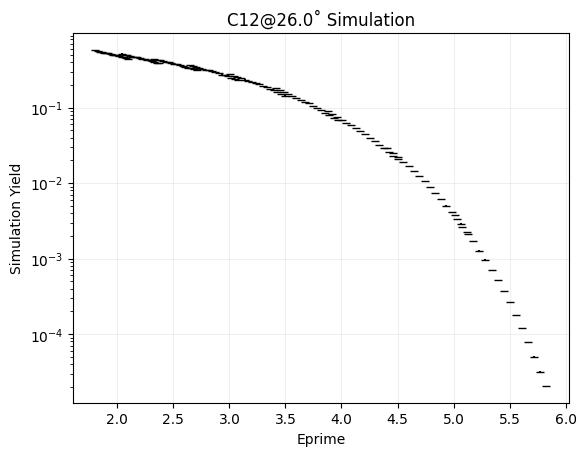

In [31]:
# Read the Cross-section table
V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13 = ImportRadcor(f"/Users/AbSir/Library/CloudStorage/GoogleDrive-asharda@vols.utk.edu/My Drive/xem2/xsec_tables/xem2_emc_rc_{nsimstring}22_hms.out")

Eprime_dict = {}
delta_dict = {}
xsec_array = {}
mc_scale = {}
thetadict = {}
ytar_weight = {}
ytarcut = {}
jacobian_weight = {}
delta_weight = {}
idang = int(dang)

for momentum in dmom:
    mom_str = str(momentum).replace('-', '').replace('.', 'p').rstrip('0')
    # mom_str = str(momentum).replace('-', '').replace('.', 'p')
    # filepath = f"/Volumes/smriti/xem2/worksim/hms_mc_{nsimstring}_{idang}degm{mom_str}.root"
    # New MC files
    filepath = f"/Volumes/smriti/xem2/worksim/hms_{idang}deg_{mom_str}gev_{nsimstring}.root"

    # Open the file and tree
    file = uproot.open(filepath)
    tree = file["h10"]

    # Load the branches
    electrons = tree.arrays(["hsdeltai", "hsytar", "hsyptari", "hsxptari", "stop_id"], library = 'np')    
    nentries = len(electrons["hsdeltai"])

    # Apply the cuts
    mc_cut = (np.abs(electrons["hsdeltai"]) <= 8) & \
            (np.abs(electrons["hsyptari"]) < 0.032) & \
            (np.abs(electrons["hsxptari"]) < 0.085) & \
            (electrons["stop_id"] == 0)
    
    # Filter 'hsdelta' with the cuts
    hsdelta_cut = electrons["hsdeltai"][mc_cut]
    hsyptar_cut = electrons["hsyptari"][mc_cut]
    hsxptar_cut = electrons["hsxptari"][mc_cut]
    hsytar_cut = electrons["hsytar"][mc_cut]

    delta_dict[momentum] = hsdelta_cut

    # Dave's delta correction
    delta_weight[momentum] = delta_correction(hsdelta_cut)

    # Calculate E' and theta (in degrees)
    Eprime_dict[momentum] = momentum * (1 + 0.01 * hsdelta_cut)
    thetarad = np.arccos((cos_ts + hsyptar_cut * sin_ts) / np.sqrt(1 + hsxptar_cut * hsxptar_cut + hsyptar_cut * hsyptar_cut))
    thetadeg = np.rad2deg(thetarad)

    # Calculate the ytar acceptance correction factor
    ytar_weight[momentum] = -0.00812174 * hsytar_cut**2 - 0.0000415678 * hsytar_cut + 1.00021
    ytarcut[momentum] = hsytar_cut

    # MC Jacobian
    jacobian_weight[momentum] = np.power((1 + np.power(hsxptar_cut, 2) + np.power(hsyptar_cut, 2)), -1.5)
        
    # Perform the interpolation
    points_ntg = np.array([V2, V3]).T # Make a 2D array and transpose it so each array is of the form [E',theta]
    points_to_interpolate = np.column_stack((Eprime_dict[momentum], thetadeg))
    xsec_array[momentum] = griddata(points_ntg, V9, points_to_interpolate, method = 'linear') # Specify the 2D array of [E's, thetas] as first argument; Radiative cross-section (V9) as the z-axis and (Ep, theta) as the point for which we need the cross-section
    mc_scale[momentum] = (lumin * domega * (ep_max[momentum] - ep_min[momentum])) / nentries         # Calculate the scale for simulation
    # print(f"Scale for {momentum} GeV: {mc_scale[momentum]}")
    thetadict[momentum] = thetadeg

hsdelta_min, hsdelta_max = np.min(delta_dict[1.95]), np.max(delta_dict[1.95])
print("Should be -8 and +8", hsdelta_min, hsdelta_max)
hsdelta_binedges = np.linspace(hsdelta_min, hsdelta_max, bin_per_mom + 1)

# This function returns 2 arrays: bin counts (the counts in each bin taking weights into account) and bin edges (the edges of the bins)
bin_edges_delta_1p95 = np.histogram(delta_dict[1.95], weights=xsec_array[1.95] * mc_scale[1.95], bins=hsdelta_binedges)[1]
bin_edges_delta_2p21 = np.histogram(delta_dict[2.21], weights=xsec_array[2.21] * mc_scale[2.21], bins=hsdelta_binedges)[1]
bin_edges_delta_2p52 = np.histogram(delta_dict[2.52], weights=xsec_array[2.52] * mc_scale[2.52], bins=hsdelta_binedges)[1]
bin_edges_delta_2p86 = np.histogram(delta_dict[2.86], weights=xsec_array[2.86] * mc_scale[2.86], bins=hsdelta_binedges)[1]
bin_edges_delta_3p25 = np.histogram(delta_dict[3.25], weights=xsec_array[3.25] * mc_scale[3.25], bins=hsdelta_binedges)[1]
bin_edges_delta_3p69 = np.histogram(delta_dict[3.69], weights=xsec_array[3.69] * mc_scale[3.69], bins=hsdelta_binedges)[1]
bin_edges_delta_4p19 = np.histogram(delta_dict[4.19], weights=xsec_array[4.19] * mc_scale[4.19], bins=hsdelta_binedges)[1]
bin_edges_delta_4p767 = np.histogram(delta_dict[4.767], weights=xsec_array[4.767] * mc_scale[4.767], bins=hsdelta_binedges)[1]
bin_edges_delta_5p42 = np.histogram(delta_dict[5.42], weights=xsec_array[5.42] * mc_scale[5.42], bins=hsdelta_binedges)[1]

# Gets the yield and yield error
bin_counts_eprime_1p95_mc_ntg, bin_errors_eprime_1p95_mc_ntg = mchist_from_array(delta_dict[1.95], xsec_array[1.95] * mc_scale[1.95] * ytar_weight[1.95] * jacobian_weight[1.95] * delta_weight[1.95], hsdelta_binedges)
bin_counts_eprime_2p21_mc_ntg, bin_errors_eprime_2p21_mc_ntg = mchist_from_array(delta_dict[2.21], xsec_array[2.21] * mc_scale[2.21] * ytar_weight[2.21] * jacobian_weight[2.21] * delta_weight[2.21], hsdelta_binedges)
bin_counts_eprime_2p52_mc_ntg, bin_errors_eprime_2p52_mc_ntg = mchist_from_array(delta_dict[2.52], xsec_array[2.52] * mc_scale[2.52] * ytar_weight[2.52] * jacobian_weight[2.52] * delta_weight[2.52], hsdelta_binedges)
bin_counts_eprime_2p86_mc_ntg, bin_errors_eprime_2p86_mc_ntg = mchist_from_array(delta_dict[2.86], xsec_array[2.86] * mc_scale[2.86] * ytar_weight[2.86] * jacobian_weight[2.86] * delta_weight[2.86], hsdelta_binedges)
bin_counts_eprime_3p25_mc_ntg, bin_errors_eprime_3p25_mc_ntg = mchist_from_array(delta_dict[3.25], xsec_array[3.25] * mc_scale[3.25] * ytar_weight[3.25] * jacobian_weight[3.25] * delta_weight[3.25], hsdelta_binedges)
bin_counts_eprime_3p69_mc_ntg, bin_errors_eprime_3p69_mc_ntg = mchist_from_array(delta_dict[3.69], xsec_array[3.69] * mc_scale[3.69] * ytar_weight[3.69] * jacobian_weight[3.69] * delta_weight[3.69], hsdelta_binedges)
bin_counts_eprime_4p19_mc_ntg, bin_errors_eprime_4p19_mc_ntg = mchist_from_array(delta_dict[4.19], xsec_array[4.19] * mc_scale[4.19] * ytar_weight[4.19] * jacobian_weight[4.19] * delta_weight[4.19], hsdelta_binedges)
bin_counts_eprime_4p767_mc_ntg, bin_errors_eprime_4p767_mc_ntg = mchist_from_array(delta_dict[4.767], xsec_array[4.767] * mc_scale[4.767] * ytar_weight[4.767] * jacobian_weight[4.767] * delta_weight[4.767], hsdelta_binedges)
bin_counts_eprime_5p42_mc_ntg, bin_errors_eprime_5p42_mc_ntg = mchist_from_array(delta_dict[5.42], xsec_array[5.42] * mc_scale[5.42] * ytar_weight[5.42] * jacobian_weight[5.42] * delta_weight[5.42], hsdelta_binedges)

# Calculate bin centers
bin_centers_delta_1p95 = (bin_edges_delta_1p95[:-1] + bin_edges_delta_1p95[1:]) / 2
bin_centers_delta_2p21 = (bin_edges_delta_2p21[:-1] + bin_edges_delta_2p21[1:]) / 2
bin_centers_delta_2p52 = (bin_edges_delta_2p52[:-1] + bin_edges_delta_2p52[1:]) / 2
bin_centers_delta_2p86 = (bin_edges_delta_2p86[:-1] + bin_edges_delta_2p86[1:]) / 2
bin_centers_delta_3p25 = (bin_edges_delta_3p25[:-1] + bin_edges_delta_3p25[1:]) / 2
bin_centers_delta_3p69 = (bin_edges_delta_3p69[:-1] + bin_edges_delta_3p69[1:]) / 2
bin_centers_delta_4p19 = (bin_edges_delta_4p19[:-1] + bin_edges_delta_4p19[1:]) / 2
bin_centers_delta_4p767 = (bin_edges_delta_4p767[:-1] + bin_edges_delta_4p767[1:]) / 2
bin_centers_delta_5p42 = (bin_edges_delta_5p42[:-1] + bin_edges_delta_5p42[1:]) / 2

# Calculate binned eprime bin centers
binned_eprime_bin_centers_1p95_mc_ntg = 1.95 * (1 + 0.01 * bin_centers_delta_1p95)
binned_eprime_bin_centers_2p21_mc_ntg = 2.21 * (1 + 0.01 * bin_centers_delta_2p21)
binned_eprime_bin_centers_2p52_mc_ntg = 2.52 * (1 + 0.01 * bin_centers_delta_2p52)
binned_eprime_bin_centers_2p86_mc_ntg = 2.86 * (1 + 0.01 * bin_centers_delta_2p86)
binned_eprime_bin_centers_3p25_mc_ntg = 3.25 * (1 + 0.01 * bin_centers_delta_3p25)
binned_eprime_bin_centers_3p69_mc_ntg = 3.69 * (1 + 0.01 * bin_centers_delta_3p69)
binned_eprime_bin_centers_4p19_mc_ntg = 4.19 * (1 + 0.01 * bin_centers_delta_4p19)
binned_eprime_bin_centers_4p767_mc_ntg = 4.767 * (1 + 0.01 * bin_centers_delta_4p767)
binned_eprime_bin_centers_5p42_mc_ntg = 5.42 * (1 + 0.01 * bin_centers_delta_5p42)

# Plotting the histogram with error bars
fig2, ax2 = plt.subplots()
ax2.errorbar(binned_eprime_bin_centers_1p95_mc_ntg, bin_counts_eprime_1p95_mc_ntg, yerr=bin_errors_eprime_1p95_mc_ntg, fmt='_', color='black', label='Sim 1.95 GeV')
ax2.errorbar(binned_eprime_bin_centers_2p21_mc_ntg, bin_counts_eprime_2p21_mc_ntg, yerr=bin_errors_eprime_2p21_mc_ntg, fmt='_', color='black', label='Sim 2.21 GeV')
ax2.errorbar(binned_eprime_bin_centers_2p52_mc_ntg, bin_counts_eprime_2p52_mc_ntg, yerr=bin_errors_eprime_2p52_mc_ntg, fmt='_', color='black', label='Sim 2.52 GeV')
ax2.errorbar(binned_eprime_bin_centers_2p86_mc_ntg, bin_counts_eprime_2p86_mc_ntg, yerr=bin_errors_eprime_2p86_mc_ntg, fmt='_', color='black', label='Sim 2.86 GeV')
ax2.errorbar(binned_eprime_bin_centers_3p25_mc_ntg, bin_counts_eprime_3p25_mc_ntg, yerr=bin_errors_eprime_3p25_mc_ntg, fmt='_', color='black', label='Sim 3.25 GeV')
ax2.errorbar(binned_eprime_bin_centers_3p69_mc_ntg, bin_counts_eprime_3p69_mc_ntg, yerr=bin_errors_eprime_3p69_mc_ntg, fmt='_', color='black', label='Sim 3.69 GeV')
ax2.errorbar(binned_eprime_bin_centers_4p19_mc_ntg, bin_counts_eprime_4p19_mc_ntg, yerr=bin_errors_eprime_4p19_mc_ntg, fmt='_', color='black', label='Sim 4.19 GeV')
ax2.errorbar(binned_eprime_bin_centers_4p767_mc_ntg, bin_counts_eprime_4p767_mc_ntg, yerr=bin_errors_eprime_4p767_mc_ntg, fmt='_', color='black', label='Sim 4.767 GeV')
ax2.errorbar(binned_eprime_bin_centers_5p42_mc_ntg, bin_counts_eprime_5p42_mc_ntg, yerr=bin_errors_eprime_5p42_mc_ntg, fmt='_', color='black', label='Sim 5.42 GeV')
ax2.grid(alpha = 0.2)
ax2.set_xlabel('Eprime')
ax2.set_ylabel('Simulation Yield')
ax2.set_yscale('log')
# ax.legend() 
ax2.set_title(f'{ntg}@{dang}˚ Simulation')
# fig2.savefig(f'{folder}/eprime_{ntg}_{dang}_{start_time:.0f}.pdf')

In [32]:
if C == 0:
    subtracted_bin_contents_1p95_ntg = subtracted_csb_contents_1p95_ntg
    subtracted_bin_contents_2p21_ntg = subtracted_csb_contents_2p21_ntg
    subtracted_bin_contents_2p52_ntg = subtracted_csb_contents_2p52_ntg
    subtracted_bin_contents_2p86_ntg = subtracted_csb_contents_2p86_ntg
    subtracted_bin_contents_3p25_ntg = subtracted_csb_contents_3p25_ntg
    subtracted_bin_contents_3p69_ntg = subtracted_csb_contents_3p69_ntg
    subtracted_bin_contents_4p19_ntg = subtracted_csb_contents_4p19_ntg
    subtracted_bin_contents_4p767_ntg = subtracted_csb_contents_4p767_ntg
    subtracted_bin_contents_5p42_ntg = subtracted_csb_contents_5p42_ntg

    subtracted_bin_errors_1p95_ntg = subtracted_csb_errors_1p95_ntg
    subtracted_bin_errors_2p21_ntg = subtracted_csb_errors_2p21_ntg
    subtracted_bin_errors_2p52_ntg = subtracted_csb_errors_2p52_ntg
    subtracted_bin_errors_2p86_ntg = subtracted_csb_errors_2p86_ntg
    subtracted_bin_errors_3p25_ntg = subtracted_csb_errors_3p25_ntg
    subtracted_bin_errors_3p69_ntg = subtracted_csb_errors_3p69_ntg
    subtracted_bin_errors_4p19_ntg = subtracted_csb_errors_4p19_ntg
    subtracted_bin_errors_4p767_ntg = subtracted_csb_errors_4p767_ntg
    subtracted_bin_errors_5p42_ntg = subtracted_csb_errors_5p42_ntg

<h1 align="center">DATA/SIMULATION YIELD RATIO FOR NTG</h1>


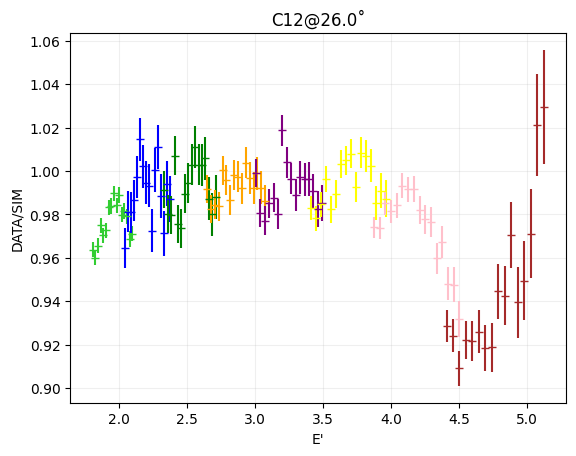

In [33]:
ratio_eprime_1p95_ntg = subtracted_bin_contents_1p95_ntg / bin_counts_eprime_1p95_mc_ntg
ratio_eprime_2p21_ntg = subtracted_bin_contents_2p21_ntg / bin_counts_eprime_2p21_mc_ntg
ratio_eprime_2p52_ntg = subtracted_bin_contents_2p52_ntg / bin_counts_eprime_2p52_mc_ntg
ratio_eprime_2p86_ntg = subtracted_bin_contents_2p86_ntg / bin_counts_eprime_2p86_mc_ntg
ratio_eprime_3p25_ntg = subtracted_bin_contents_3p25_ntg / bin_counts_eprime_3p25_mc_ntg
ratio_eprime_3p69_ntg = subtracted_bin_contents_3p69_ntg / bin_counts_eprime_3p69_mc_ntg
ratio_eprime_4p19_ntg = subtracted_bin_contents_4p19_ntg / bin_counts_eprime_4p19_mc_ntg
ratio_eprime_4p767_ntg = subtracted_bin_contents_4p767_ntg / bin_counts_eprime_4p767_mc_ntg
ratio_eprime_5p42_ntg = subtracted_bin_contents_5p42_ntg / bin_counts_eprime_5p42_mc_ntg

# Add errors in quadrature. First is data and second is MC
ratio_errors_1p95_ntg = ratio_eprime_1p95_ntg * np.sqrt((subtracted_bin_errors_1p95_ntg / subtracted_bin_contents_1p95_ntg)**2 + (bin_errors_eprime_1p95_mc_ntg / bin_counts_eprime_1p95_mc_ntg)**2)
ratio_errors_2p21_ntg = ratio_eprime_2p21_ntg * np.sqrt((subtracted_bin_errors_2p21_ntg / subtracted_bin_contents_2p21_ntg)**2 + (bin_errors_eprime_2p21_mc_ntg / bin_counts_eprime_2p21_mc_ntg)**2)
ratio_errors_2p52_ntg = ratio_eprime_2p52_ntg * np.sqrt((subtracted_bin_errors_2p52_ntg / subtracted_bin_contents_2p52_ntg)**2 + (bin_errors_eprime_2p52_mc_ntg / bin_counts_eprime_2p52_mc_ntg)**2)
ratio_errors_2p86_ntg = ratio_eprime_2p86_ntg * np.sqrt((subtracted_bin_errors_2p86_ntg / subtracted_bin_contents_2p86_ntg)**2 + (bin_errors_eprime_2p86_mc_ntg / bin_counts_eprime_2p86_mc_ntg)**2)
ratio_errors_3p25_ntg = ratio_eprime_3p25_ntg * np.sqrt((subtracted_bin_errors_3p25_ntg / subtracted_bin_contents_3p25_ntg)**2 + (bin_errors_eprime_3p25_mc_ntg / bin_counts_eprime_3p25_mc_ntg)**2)
ratio_errors_3p69_ntg = ratio_eprime_3p69_ntg * np.sqrt((subtracted_bin_errors_3p69_ntg / subtracted_bin_contents_3p69_ntg)**2 + (bin_errors_eprime_3p69_mc_ntg / bin_counts_eprime_3p69_mc_ntg)**2)
ratio_errors_4p19_ntg = ratio_eprime_4p19_ntg * np.sqrt((subtracted_bin_errors_4p19_ntg / subtracted_bin_contents_4p19_ntg)**2 + (bin_errors_eprime_4p19_mc_ntg / bin_counts_eprime_4p19_mc_ntg)**2)
ratio_errors_4p767_ntg = ratio_eprime_4p767_ntg * np.sqrt((subtracted_bin_errors_4p767_ntg / subtracted_bin_contents_4p767_ntg)**2 + (bin_errors_eprime_4p767_mc_ntg / bin_counts_eprime_4p767_mc_ntg)**2)
ratio_errors_5p42_ntg = ratio_eprime_5p42_ntg * np.sqrt((subtracted_bin_errors_5p42_ntg / subtracted_bin_contents_5p42_ntg)**2 + (bin_errors_eprime_5p42_mc_ntg / bin_counts_eprime_5p42_mc_ntg)**2)

fig2, ax2 = plt.subplots()
ax2.errorbar(binned_eprime_bin_centers_1p95, ratio_eprime_1p95_ntg, yerr=ratio_errors_1p95_ntg, fmt = '_', color = 'limegreen', label = '1.95 GeV')
ax2.errorbar(binned_eprime_bin_centers_2p21, ratio_eprime_2p21_ntg, yerr=ratio_errors_2p21_ntg, fmt = '_', color = 'blue', label = '2.21 GeV')
ax2.errorbar(binned_eprime_bin_centers_2p52, ratio_eprime_2p52_ntg, yerr=ratio_errors_2p52_ntg, fmt = '_', color = 'green', label = '2.52 GeV')
ax2.errorbar(binned_eprime_bin_centers_2p86, ratio_eprime_2p86_ntg, yerr=ratio_errors_2p86_ntg, fmt = '_', color = 'orange', label = '2.86 GeV')
ax2.errorbar(binned_eprime_bin_centers_3p25, ratio_eprime_3p25_ntg, yerr=ratio_errors_3p25_ntg, fmt = '_', color = 'purple', label = '3.25 GeV')
ax2.errorbar(binned_eprime_bin_centers_3p69, ratio_eprime_3p69_ntg, yerr=ratio_errors_3p69_ntg, fmt = '_', color = 'yellow', label = '3.69 GeV')
ax2.errorbar(binned_eprime_bin_centers_4p19, ratio_eprime_4p19_ntg, yerr=ratio_errors_4p19_ntg, fmt = '_', color = 'pink', label = '4.19 GeV')
ax2.errorbar(binned_eprime_bin_centers_4p767, ratio_eprime_4p767_ntg, yerr=ratio_errors_4p767_ntg, fmt = '_', color = 'brown', label = '4.767 GeV')
# ax2.errorbar(binned_eprime_bin_centers_5p42, ratio_eprime_5p42_ntg, yerr=ratio_errors_5p42_ntg, fmt = '_', color = 'red', label = '5.42 GeV')
ax2.set_xlabel('E\'')
ax2.set_ylabel('DATA/SIM')
ax2.set_title(f'{ntg}@{dang}˚')
ax2.grid(alpha = 0.2)
# ax2.set_ylim(0.5, 1.1)
fig2.savefig(f'{folder}/yieldratio_{ntg}_{dang}_{start_time:.0f}.pdf')

<h1 align="center">BORN CROSS SECTION CALCULATION FOR NTG</h1>


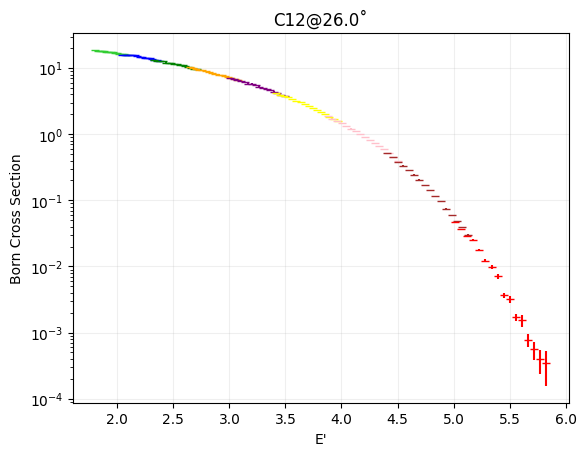

In [34]:
# Get points to interpolate based on angle and E'. Common for ntg and dtg
points_to_interpolate_1p95 = np.column_stack((binned_eprime_bin_centers_1p95, np.full(len(binned_eprime_bin_centers_1p95), dang)))
points_to_interpolate_2p21 = np.column_stack((binned_eprime_bin_centers_2p21, np.full(len(binned_eprime_bin_centers_2p21), dang)))
points_to_interpolate_2p52 = np.column_stack((binned_eprime_bin_centers_2p52, np.full(len(binned_eprime_bin_centers_2p52), dang)))
points_to_interpolate_2p86 = np.column_stack((binned_eprime_bin_centers_2p86, np.full(len(binned_eprime_bin_centers_2p86), dang)))
points_to_interpolate_3p25 = np.column_stack((binned_eprime_bin_centers_3p25, np.full(len(binned_eprime_bin_centers_3p25), dang)))
points_to_interpolate_3p69 = np.column_stack((binned_eprime_bin_centers_3p69, np.full(len(binned_eprime_bin_centers_3p69), dang)))
points_to_interpolate_4p19 = np.column_stack((binned_eprime_bin_centers_4p19, np.full(len(binned_eprime_bin_centers_4p19), dang)))
points_to_interpolate_4p767 = np.column_stack((binned_eprime_bin_centers_4p767, np.full(len(binned_eprime_bin_centers_4p767), dang)))
points_to_interpolate_5p42 = np.column_stack((binned_eprime_bin_centers_5p42, np.full(len(binned_eprime_bin_centers_5p42), dang)))

# Interpolate again to get model Born cross-section
born_xsec_array_1p95_ntg = griddata(points_ntg, V6, points_to_interpolate_1p95, method = 'linear')
born_xsec_array_2p21_ntg = griddata(points_ntg, V6, points_to_interpolate_2p21, method = 'linear')
born_xsec_array_2p52_ntg = griddata(points_ntg, V6, points_to_interpolate_2p52, method = 'linear')
born_xsec_array_2p86_ntg = griddata(points_ntg, V6, points_to_interpolate_2p86, method = 'linear')
born_xsec_array_3p25_ntg = griddata(points_ntg, V6, points_to_interpolate_3p25, method = 'linear')
born_xsec_array_3p69_ntg = griddata(points_ntg, V6, points_to_interpolate_3p69, method = 'linear')
born_xsec_array_4p19_ntg = griddata(points_ntg, V6, points_to_interpolate_4p19, method = 'linear')
born_xsec_array_4p767_ntg = griddata(points_ntg, V6, points_to_interpolate_4p767, method = 'linear')
born_xsec_array_5p42_ntg = griddata(points_ntg, V6, points_to_interpolate_5p42, method = 'linear')

# Get the QE piece
qe_array_1p95_ntg = griddata(points_ntg, V8, points_to_interpolate_1p95, method = 'linear')
qe_array_2p21_ntg = griddata(points_ntg, V8, points_to_interpolate_2p21, method = 'linear')
qe_array_2p52_ntg = griddata(points_ntg, V8, points_to_interpolate_2p52, method = 'linear')
qe_array_2p86_ntg = griddata(points_ntg, V8, points_to_interpolate_2p86, method = 'linear')
qe_array_3p25_ntg = griddata(points_ntg, V8, points_to_interpolate_3p25, method = 'linear')
qe_array_3p69_ntg = griddata(points_ntg, V8, points_to_interpolate_3p69, method = 'linear')
qe_array_4p19_ntg = griddata(points_ntg, V8, points_to_interpolate_4p19, method = 'linear')
qe_array_4p767_ntg = griddata(points_ntg, V8, points_to_interpolate_4p767, method = 'linear')
qe_array_5p42_ntg = griddata(points_ntg, V8, points_to_interpolate_5p42, method = 'linear')

# Interpolate 3rd time to get Coulomb correction factor
ccf_1p95_ntg = griddata(points_ntg, V13, points_to_interpolate_1p95, method = 'linear')
ccf_2p21_ntg = griddata(points_ntg, V13, points_to_interpolate_2p21, method = 'linear')
ccf_2p52_ntg = griddata(points_ntg, V13, points_to_interpolate_2p52, method = 'linear')
ccf_2p86_ntg = griddata(points_ntg, V13, points_to_interpolate_2p86, method = 'linear')
ccf_3p25_ntg = griddata(points_ntg, V13, points_to_interpolate_3p25, method = 'linear')
ccf_3p69_ntg = griddata(points_ntg, V13, points_to_interpolate_3p69, method = 'linear')
ccf_4p19_ntg = griddata(points_ntg, V13, points_to_interpolate_4p19, method = 'linear')
ccf_4p767_ntg = griddata(points_ntg, V13, points_to_interpolate_4p767, method = 'linear')
ccf_5p42_ntg = griddata(points_ntg, V13, points_to_interpolate_5p42, method = 'linear')

fig3, ax3 = plt.subplots()
# Calculate the data Born cross-section and apply Coloumb corrections
born_cross_1p95_ntg = ratio_eprime_1p95_ntg * born_xsec_array_1p95_ntg * ccf_1p95_ntg
born_cross_2p21_ntg = ratio_eprime_2p21_ntg * born_xsec_array_2p21_ntg * ccf_2p21_ntg
born_cross_2p52_ntg = ratio_eprime_2p52_ntg * born_xsec_array_2p52_ntg * ccf_2p52_ntg
born_cross_2p86_ntg = ratio_eprime_2p86_ntg * born_xsec_array_2p86_ntg * ccf_2p86_ntg
born_cross_3p25_ntg = ratio_eprime_3p25_ntg * born_xsec_array_3p25_ntg * ccf_3p25_ntg
born_cross_3p69_ntg = ratio_eprime_3p69_ntg * born_xsec_array_3p69_ntg * ccf_3p69_ntg
born_cross_4p19_ntg = ratio_eprime_4p19_ntg * born_xsec_array_4p19_ntg * ccf_4p19_ntg
born_cross_4p767_ntg = ratio_eprime_4p767_ntg * born_xsec_array_4p767_ntg * ccf_4p767_ntg
born_cross_5p42_ntg = ratio_eprime_5p42_ntg * born_xsec_array_5p42_ntg * ccf_5p42_ntg

# Calculate errors for born cross-sections
born_errors_1p95_ntg = born_cross_1p95_ntg * ratio_errors_1p95_ntg
born_errors_2p21_ntg = born_cross_2p21_ntg * ratio_errors_2p21_ntg
born_errors_2p52_ntg = born_cross_2p52_ntg * ratio_errors_2p52_ntg
born_errors_2p86_ntg = born_cross_2p86_ntg * ratio_errors_2p86_ntg
born_errors_3p25_ntg = born_cross_3p25_ntg * ratio_errors_3p25_ntg
born_errors_3p69_ntg = born_cross_3p69_ntg * ratio_errors_3p69_ntg
born_errors_4p19_ntg = born_cross_4p19_ntg * ratio_errors_4p19_ntg
born_errors_4p767_ntg = born_cross_4p767_ntg * ratio_errors_4p767_ntg
born_errors_5p42_ntg = born_cross_5p42_ntg * ratio_errors_5p42_ntg

# Plotting the born cross-sections with errors
ax3.errorbar(binned_eprime_bin_centers_1p95, born_cross_1p95_ntg, yerr = born_errors_1p95_ntg, fmt = '_', color = 'limegreen', label = '1.95 GeV')
ax3.errorbar(binned_eprime_bin_centers_2p21, born_cross_2p21_ntg, yerr = born_errors_2p21_ntg, fmt = '_', color = 'blue', label = '2.21 GeV')
ax3.errorbar(binned_eprime_bin_centers_2p52, born_cross_2p52_ntg, yerr = born_errors_2p52_ntg, fmt = '_', color = 'green', label = '2.52 GeV')
ax3.errorbar(binned_eprime_bin_centers_2p86, born_cross_2p86_ntg, yerr = born_errors_2p86_ntg, fmt = '_', color = 'orange', label = '2.86 GeV')
ax3.errorbar(binned_eprime_bin_centers_3p25, born_cross_3p25_ntg, yerr = born_errors_3p25_ntg, fmt = '_', color = 'purple', label = '3.25 GeV')
ax3.errorbar(binned_eprime_bin_centers_3p69, born_cross_3p69_ntg, yerr = born_errors_3p69_ntg, fmt = '_', color = 'yellow', label = '3.69 GeV')
ax3.errorbar(binned_eprime_bin_centers_4p19, born_cross_4p19_ntg, yerr = born_errors_4p19_ntg, fmt = '_', color = 'pink', label = '4.19 GeV')
ax3.errorbar(binned_eprime_bin_centers_4p767, born_cross_4p767_ntg, yerr = born_errors_4p767_ntg, fmt = '_', color = 'brown', label = '4.767 GeV')
ax3.errorbar(binned_eprime_bin_centers_5p42, born_cross_5p42_ntg, yerr = born_errors_5p42_ntg, fmt = '_', color = 'red', label = '5.42 GeV')
ax3.set_xlabel('E\'')
ax3.set_ylabel('Born Cross Section')
ax3.set_title(f'{ntg}@{dang}˚')
ax3.set_yscale('log')
#ax3.legend()
ax3.grid(alpha = 0.2)
# fig3.savefig(f'{folder}/xsec_{ntg}_{dang}_{start_time:.0f}.pdf')

<h1 align="center">DATA WORK FOR DUMMY TARGET</h1>


Mean scaling factor for Dummy_26 at 1.95 GeV/c is 0.00016389555275988797
Total scaling factor for Dummy_26 at 1.95 GeV/c is 12202.893649774998
Scaling factor for Dummy_26 at 1.95 GeV/c is 8.194777637994398e-05
Counts for Dummy_26 at 1.95 GeV is 5374
Mean scaling factor for Dummy_26 at 2.21 GeV/c is 9.919879406971906e-05
Total scaling factor for Dummy_26 at 2.21 GeV/c is 10080.76770869995
Scaling factor for Dummy_26 at 2.21 GeV/c is 9.919879406971906e-05
Counts for Dummy_26 at 2.21 GeV is 3881
Mean scaling factor for Dummy_26 at 2.52 GeV/c is 4.779864641652747e-05
Total scaling factor for Dummy_26 at 2.52 GeV/c is 20921.09452819625
Scaling factor for Dummy_26 at 2.52 GeV/c is 4.779864641652747e-05
Counts for Dummy_26 at 2.52 GeV is 6806
Mean scaling factor for Dummy_26 at 2.86 GeV/c is 4.9204691629369395e-05
Total scaling factor for Dummy_26 at 2.86 GeV/c is 20323.26525958996
Scaling factor for Dummy_26 at 2.86 GeV/c is 4.9204691629369395e-05
Counts for Dummy_26 at 2.86 GeV is 5435
Mean

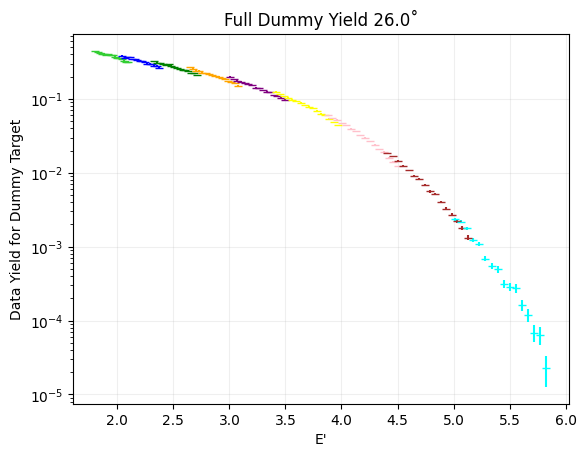

In [35]:
E = 0.2165 # Mean of Ratio of upstream & downstream dummy to target cell thickness
acont_tg = ald + '_' + str(int(dang))
cont_dict_name = f'{acont_tg}_dict' # Dictionary containing the runs for the dummy
cont_dict = globals()[cont_dict_name]
Z, A = 13, 27 # Target
ytar_hist = {}

for momentum in dmom:
    # Get the runs where data for Dummy target was taken
    files = [f'/Volumes/smriti/xem2/ROOTfiles/HMS_{run}_skim.root' for run in cont_dict[momentum]]
    # Grab relevant bracnhes. ytar needed for upstream/downstream differentiation
    branches = ['H_gtr_dp', 'H_cal_etottracknorm', 'H_gtr_ph', 'H_gtr_th', 'H_cer_npeSum', 'H_bcm_CurrentFlag', 'H_gtr_y']
    electrons = uproot.concatenate(files, branches)

    data_cut = (np.abs(electrons['H_gtr_dp']) < 8) & (electrons['H_cal_etottracknorm'] > 0.7) & (np.abs(electrons['H_gtr_ph']) < 0.032) & (np.abs(electrons['H_gtr_th']) < 0.085) & (electrons['H_cer_npeSum'] > 2) & (electrons['H_bcm_CurrentFlag'] == 1)
    dp_cut = electrons['H_gtr_dp'][data_cut]
    theta_cut = electrons['H_gtr_th'][data_cut]
    phi_cut = electrons['H_gtr_ph'][data_cut]
    y_cut = electrons['H_gtr_y'][data_cut]

    theta_dict[momentum] = np.rad2deg(np.arccos((cos_ts + phi_cut * sin_ts)/np.sqrt(1 + theta_cut * theta_cut + phi_cut * phi_cut)))
    delta_hist[momentum] = np.array(dp_cut)
    ytar_hist[momentum] = np.array(y_cut)

dummy_eprime_bin_contents_1p95, dummy_eprime_bin_errors_1p95 = datahist_from_array(delta_hist[1.95], 1.95, hsdelta_binedges, acont_tg)
dummy_eprime_bin_contents_2p21, dummy_eprime_bin_errors_2p21 = datahist_from_array(delta_hist[2.21], 2.21, hsdelta_binedges, acont_tg)
dummy_eprime_bin_contents_2p52, dummy_eprime_bin_errors_2p52 = datahist_from_array(delta_hist[2.52], 2.52, hsdelta_binedges, acont_tg)
dummy_eprime_bin_contents_2p86, dummy_eprime_bin_errors_2p86 = datahist_from_array(delta_hist[2.86], 2.86, hsdelta_binedges, acont_tg)
dummy_eprime_bin_contents_3p25, dummy_eprime_bin_errors_3p25 = datahist_from_array(delta_hist[3.25], 3.25, hsdelta_binedges, acont_tg)
dummy_eprime_bin_contents_3p69, dummy_eprime_bin_errors_3p69 = datahist_from_array(delta_hist[3.69], 3.69, hsdelta_binedges, acont_tg)
dummy_eprime_bin_contents_4p19, dummy_eprime_bin_errors_4p19 = datahist_from_array(delta_hist[4.19], 4.19, hsdelta_binedges, acont_tg)
dummy_eprime_bin_contents_4p767, dummy_eprime_bin_errors_4p767 = datahist_from_array(delta_hist[4.767], 4.767, hsdelta_binedges, acont_tg)
dummy_eprime_bin_contents_5p42, dummy_eprime_bin_errors_5p42 = datahist_from_array(delta_hist[5.42], 5.42, hsdelta_binedges, acont_tg)

plt.errorbar(binned_eprime_bin_centers_1p95, dummy_eprime_bin_contents_1p95, yerr = dummy_eprime_bin_errors_1p95, fmt = '_', label = '1.95 GeV', color = 'limegreen')
plt.errorbar(binned_eprime_bin_centers_2p21, dummy_eprime_bin_contents_2p21, yerr = dummy_eprime_bin_errors_2p21, fmt = '_', label = '2.21 GeV', color = 'blue')
plt.errorbar(binned_eprime_bin_centers_2p52, dummy_eprime_bin_contents_2p52, yerr = dummy_eprime_bin_errors_2p52, fmt = '_', label = '2.52 GeV', color = 'green')
plt.errorbar(binned_eprime_bin_centers_2p86, dummy_eprime_bin_contents_2p86, yerr = dummy_eprime_bin_errors_2p86, fmt = '_', label = '2.86 GeV', color = 'orange')
plt.errorbar(binned_eprime_bin_centers_3p25, dummy_eprime_bin_contents_3p25, yerr = dummy_eprime_bin_errors_3p25, fmt = '_', label = '3.25 GeV', color = 'purple')
plt.errorbar(binned_eprime_bin_centers_3p69, dummy_eprime_bin_contents_3p69, yerr = dummy_eprime_bin_errors_3p69, fmt = '_', label = '3.69 GeV', color = 'yellow')
plt.errorbar(binned_eprime_bin_centers_4p19, dummy_eprime_bin_contents_4p19, yerr = dummy_eprime_bin_errors_4p19, fmt = '_', label = '4.19 GeV', color = 'pink')
plt.errorbar(binned_eprime_bin_centers_4p767, dummy_eprime_bin_contents_4p767, yerr = dummy_eprime_bin_errors_4p767, fmt = '_', label = '4.767 GeV', color = 'brown')
plt.errorbar(binned_eprime_bin_centers_5p42, dummy_eprime_bin_contents_5p42, yerr = dummy_eprime_bin_errors_5p42, fmt = '_', label = '5.42 GeV', color = 'cyan')
plt.grid(alpha = 0.2)
plt.xlabel('E\'')
plt.ylabel('Data Yield for Dummy Target')
plt.title(f'Full {ald} Yield {dang}˚')
plt.yscale('log')

<h1 align="center">DATA WORK FOR DTG</h1>

In [36]:
# Kinematic variables
Z, A = target_info[dtg][0], target_info[dtg][1]  # Target
thick = target_info[dtg][2] # g/cm2. From Cameron's target sheet column 'R'
thick = thick * 0.996 # Cryo target contraction correction factor
lumin = thick * sim_charge / A * N_A / Q_E * 1e-39
ytar = {}
ytar_hist = {}
delta_hist = {}
eff_weight = {}
dtg_dict_name = f'{adtg}_dict'
dtg_dict = globals()[dtg_dict_name]

for momentum in dmom:
    print(f"Processing momentum {momentum}: runs = {dtg_dict[momentum]}")
    files = [f'/Volumes/smriti/xem2/ROOTfiles/HMS_{run}_skim.root' for run in dtg_dict[momentum]]
    branches = ['H_gtr_dp', 'H_cal_etottracknorm', 'H_gtr_ph', 'H_gtr_th', 'H_cer_npeSum', 'H_bcm_CurrentFlag']
    electrons_dtg = uproot.concatenate(files, branches)
    if momentum == 1.95:
        print(f"For {momentum} GeV, total number of delta events are {len(electrons_dtg['H_gtr_dp'])}")

    data_cut = (np.abs(electrons_dtg['H_gtr_dp']) < 8) & (electrons_dtg['H_cal_etottracknorm'] > 0.7) & (np.abs(electrons_dtg['H_gtr_ph']) < 0.032) & (np.abs(electrons_dtg['H_gtr_th']) < 0.085) & (electrons_dtg['H_cer_npeSum'] > 2) & (electrons_dtg['H_bcm_CurrentFlag'] == 1)
    dp_cut = electrons_dtg['H_gtr_dp'][data_cut]

    # Cherenkov efficiency correction
    eff_weight[momentum] = 1 / cereff(dp_cut)
    delta_hist[momentum] = np.array(dp_cut)
    print(f'For {momentum} GeV, the good electron number is {len(dp_cut)}')

Processing momentum 1.95: runs = [4452]
For 1.95 GeV, total number of delta events are 232616
For 1.95 GeV, the good electron number is 149088
Processing momentum 2.21: runs = [4560]
For 2.21 GeV, the good electron number is 159417
Processing momentum 2.52: runs = [4547]
For 2.52 GeV, the good electron number is 276112
Processing momentum 2.86: runs = [4546]
For 2.86 GeV, the good electron number is 451434
Processing momentum 3.25: runs = [4532]
For 3.25 GeV, the good electron number is 266284
Processing momentum 3.69: runs = [4528]
For 3.69 GeV, the good electron number is 306878
Processing momentum 4.19: runs = [4509]
For 4.19 GeV, the good electron number is 328352
Processing momentum 4.767: runs = [4504]
For 4.767 GeV, the good electron number is 72708
Processing momentum 5.42: runs = [4474]
For 5.42 GeV, the good electron number is 1454


Target boiling correction not applied for cryo target LD2_26
Mean scaling factor for LD2_26 at 1.95 GeV/c is 0.00016202976397149845
Total scaling factor for LD2_26 at 1.95 GeV/c is 6171.705589695873
Scaling factor for LD2_26 at 1.95 GeV/c is 0.00016202976397149845
Counts for LD2_26 at 1.95 GeV is 10999
Target boiling correction not applied for cryo target LD2_26
Mean scaling factor for LD2_26 at 2.21 GeV/c is 0.00012782460363971698
Total scaling factor for LD2_26 at 2.21 GeV/c is 7823.220033746972
Scaling factor for LD2_26 at 2.21 GeV/c is 0.00012782460363971698
Counts for LD2_26 at 2.21 GeV is 12039.223534119785
Target boiling correction not applied for cryo target LD2_26
Mean scaling factor for LD2_26 at 2.52 GeV/c is 6.116379354168462e-05
Total scaling factor for LD2_26 at 2.52 GeV/c is 16349.541813793412
Scaling factor for LD2_26 at 2.52 GeV/c is 6.116379354168462e-05
Counts for LD2_26 at 2.52 GeV is 20454.272563536953
Target boiling correction not applied for cryo target LD2_26
Me

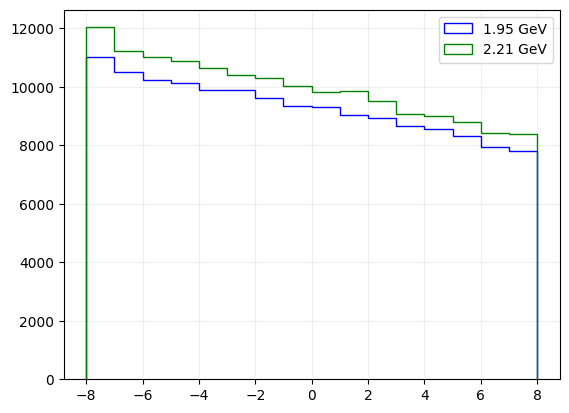

In [37]:
eprime_bin_contents_1p95_dtg, eprime_bin_errors_1p95_dtg = datahist_from_array(delta_hist[1.95], 1.95, data_delta, adtg)
eprime_bin_contents_2p21_dtg, eprime_bin_errors_2p21_dtg = datahist_from_array(delta_hist[2.21], 2.21, data_delta, adtg, eff_weight[2.21])
eprime_bin_contents_2p52_dtg, eprime_bin_errors_2p52_dtg = datahist_from_array(delta_hist[2.52], 2.52, data_delta, adtg, eff_weight[2.52])
eprime_bin_contents_2p86_dtg, eprime_bin_errors_2p86_dtg = datahist_from_array(delta_hist[2.86], 2.86, data_delta, adtg, eff_weight[2.86])
eprime_bin_contents_3p25_dtg, eprime_bin_errors_3p25_dtg = datahist_from_array(delta_hist[3.25], 3.25, data_delta, adtg, eff_weight[3.25])
eprime_bin_contents_3p69_dtg, eprime_bin_errors_3p69_dtg = datahist_from_array(delta_hist[3.69], 3.69, data_delta, adtg, eff_weight[3.69])
eprime_bin_contents_4p19_dtg, eprime_bin_errors_4p19_dtg = datahist_from_array(delta_hist[4.19], 4.19, data_delta, adtg, eff_weight[4.19])
eprime_bin_contents_4p767_dtg, eprime_bin_errors_4p767_dtg = datahist_from_array(delta_hist[4.767], 4.767, data_delta, adtg, eff_weight[4.767])
eprime_bin_contents_5p42_dtg, eprime_bin_errors_5p42_dtg = datahist_from_array(delta_hist[5.42], 5.42, data_delta, adtg, eff_weight[5.42])
print(len(delta_hist[1.95]), len(delta_hist[2.21]), len(delta_hist[2.52]), len(delta_hist[2.86]))
# plt.hist(delta_hist[1.95], bins = data_delta, histtype = 'step', label = '1.95 GeV', color = 'blue', weights = np.ones_like(delta_hist[1.95]) * read_report(1.95, adtg))
# plt.hist(delta_hist[2.21], bins = data_delta, histtype = 'step', label = '2.21 GeV', color = 'green', weights = np.ones_like(delta_hist[2.21]) * read_report(2.21, adtg))
plt.hist(delta_hist[1.95], bins = data_delta, histtype = 'step', label = '1.95 GeV', color = 'blue')
plt.hist(delta_hist[2.21], bins = data_delta, histtype = 'step', label = '2.21 GeV', color = 'green')
plt.grid(alpha = 0.2)
plt.legend()

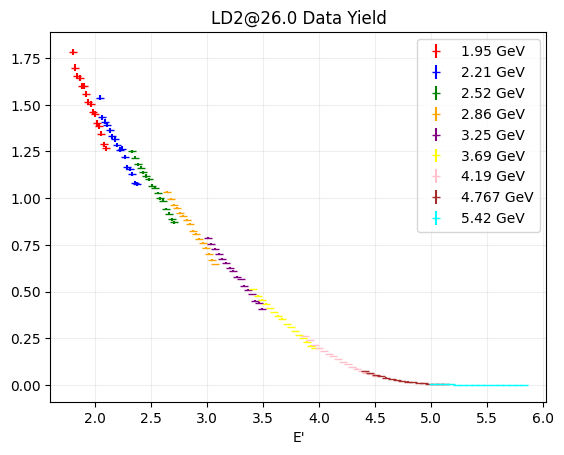

In [38]:
fig3, ax3 = plt.subplots()
ax3.errorbar(binned_eprime_bin_centers_1p95, eprime_bin_contents_1p95_dtg, yerr = eprime_bin_errors_1p95_dtg, fmt = '_', color = 'red', label = '1.95 GeV')
ax3.errorbar(binned_eprime_bin_centers_2p21, eprime_bin_contents_2p21_dtg, yerr = eprime_bin_errors_2p21_dtg, fmt = '_', color = 'blue', label = '2.21 GeV')
ax3.errorbar(binned_eprime_bin_centers_2p52, eprime_bin_contents_2p52_dtg, yerr = eprime_bin_errors_2p52_dtg, fmt = '_', color = 'green', label = '2.52 GeV')
ax3.errorbar(binned_eprime_bin_centers_2p86, eprime_bin_contents_2p86_dtg, yerr = eprime_bin_errors_2p86_dtg, fmt = '_', color = 'orange', label = '2.86 GeV')
ax3.errorbar(binned_eprime_bin_centers_3p25, eprime_bin_contents_3p25_dtg, yerr = eprime_bin_errors_3p25_dtg, fmt = '_', color = 'purple', label = '3.25 GeV')
ax3.errorbar(binned_eprime_bin_centers_3p69, eprime_bin_contents_3p69_dtg, yerr = eprime_bin_errors_3p69_dtg, fmt = '_', color = 'yellow', label = '3.69 GeV')
ax3.errorbar(binned_eprime_bin_centers_4p19, eprime_bin_contents_4p19_dtg, yerr = eprime_bin_errors_4p19_dtg, fmt = '_', color = 'pink', label = '4.19 GeV')
ax3.errorbar(binned_eprime_bin_centers_4p767, eprime_bin_contents_4p767_dtg, yerr = eprime_bin_errors_4p767_dtg, fmt = '_', color = 'brown', label = '4.767 GeV')
ax3.errorbar(binned_eprime_bin_centers_5p42, eprime_bin_contents_5p42_dtg, yerr = eprime_bin_errors_5p42_dtg, fmt = '_', color = 'cyan', label = '5.42 GeV')
ax3.set_xlabel('E\'')
ax3.legend()
# ax3.set_yscale('log')
ax3.set_title(f'LD2@{dang} Data Yield')
ax3.grid(alpha = 0.2)
# fig3.savefig(f'{folder}/data_yield_{dtg}_{dang}_{start_time:.0f}.pdf')

<h2 style="text-align: center; color: silver">Subtracting CSB from full cryo target yield and dummy</h2>

Text(0.5, 1.0, 'Dummy Subtracted LD2@26˚ Data Yield')

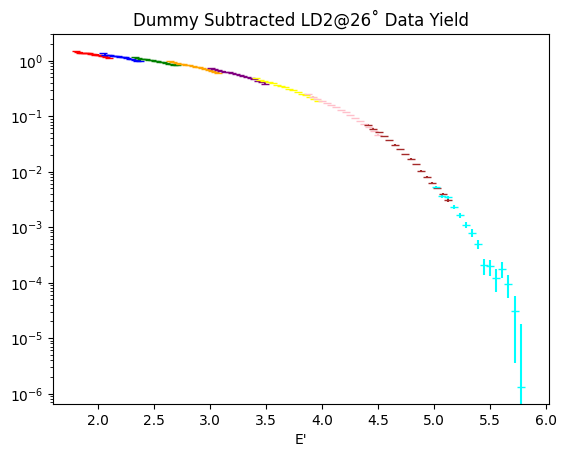

In [46]:
# Calculate the charge symmetric background fraction per bin for full cryo target
csb_frac_1p95_dtg = csb(binned_eprime_bin_centers_1p95, dtg, dang)
csb_frac_2p21_dtg = csb(binned_eprime_bin_centers_2p21, dtg, dang)
csb_frac_2p52_dtg = csb(binned_eprime_bin_centers_2p52, dtg, dang)
csb_frac_2p86_dtg = csb(binned_eprime_bin_centers_2p86, dtg, dang)
csb_frac_3p25_dtg = csb(binned_eprime_bin_centers_3p25, dtg, dang)
csb_frac_3p69_dtg = csb(binned_eprime_bin_centers_3p69, dtg, dang)
csb_frac_4p19_dtg = csb(binned_eprime_bin_centers_4p19, dtg, dang)
csb_frac_4p767_dtg = csb(binned_eprime_bin_centers_4p767, dtg, dang)
csb_frac_5p42_dtg = csb(binned_eprime_bin_centers_5p42, dtg, dang)

# Calculate the charge symmetric background fraction per bin for dummy target
csb_frac_1p95_ald = csb(binned_eprime_bin_centers_1p95, ald, dang)
csb_frac_2p21_ald = csb(binned_eprime_bin_centers_2p21, ald, dang)
csb_frac_2p52_ald = csb(binned_eprime_bin_centers_2p52, ald, dang)
csb_frac_2p86_ald = csb(binned_eprime_bin_centers_2p86, ald, dang)
csb_frac_3p25_ald = csb(binned_eprime_bin_centers_3p25, ald, dang)
csb_frac_3p69_ald = csb(binned_eprime_bin_centers_3p69, ald, dang)
csb_frac_4p19_ald = csb(binned_eprime_bin_centers_4p19, ald, dang)
csb_frac_4p767_ald = csb(binned_eprime_bin_centers_4p767, ald, dang)
csb_frac_5p42_ald = csb(binned_eprime_bin_centers_5p42, ald, dang)

fig4, ax4 = plt.subplots()
# Perform CSB subtraction on dummy target
subtracted_bin_contents_1p95_ald = dummy_eprime_bin_contents_1p95 * (1 - csb_frac_1p95_ald)
subtracted_bin_contents_2p21_ald = dummy_eprime_bin_contents_2p21 * (1 - csb_frac_2p21_ald)
subtracted_bin_contents_2p52_ald = dummy_eprime_bin_contents_2p52 * (1 - csb_frac_2p52_ald)
subtracted_bin_contents_2p86_ald = dummy_eprime_bin_contents_2p86 * (1 - csb_frac_2p86_ald)
subtracted_bin_contents_3p25_ald = dummy_eprime_bin_contents_3p25 * (1 - csb_frac_3p25_ald)
subtracted_bin_contents_3p69_ald = dummy_eprime_bin_contents_3p69 * (1 - csb_frac_3p69_ald)
subtracted_bin_contents_4p19_ald = dummy_eprime_bin_contents_4p19 * (1 - csb_frac_4p19_ald)
subtracted_bin_contents_4p767_ald = dummy_eprime_bin_contents_4p767 * (1 - csb_frac_4p767_ald)
subtracted_bin_contents_5p42_ald = dummy_eprime_bin_contents_5p42 * (1 - csb_frac_5p42_ald)

subtracted_bin_errors_1p95_ald = dummy_eprime_bin_errors_1p95 * (1 - csb_frac_1p95_ald)
subtracted_bin_errors_2p21_ald = dummy_eprime_bin_errors_2p21 * (1 - csb_frac_2p21_ald)
subtracted_bin_errors_2p52_ald = dummy_eprime_bin_errors_2p52 * (1 - csb_frac_2p52_ald)
subtracted_bin_errors_2p86_ald = dummy_eprime_bin_errors_2p86 * (1 - csb_frac_2p86_ald)
subtracted_bin_errors_3p25_ald = dummy_eprime_bin_errors_3p25 * (1 - csb_frac_3p25_ald)
subtracted_bin_errors_3p69_ald = dummy_eprime_bin_errors_3p69 * (1 - csb_frac_3p69_ald)
subtracted_bin_errors_4p19_ald = dummy_eprime_bin_errors_4p19 * (1 - csb_frac_4p19_ald)
subtracted_bin_errors_4p767_ald = dummy_eprime_bin_errors_4p767 * (1 - csb_frac_4p767_ald)
subtracted_bin_errors_5p42_ald = dummy_eprime_bin_errors_5p42 * (1 - csb_frac_5p42_ald)

# Subtract the charge symmetric background fraction from the full cryo yield
subtracted_bin_contents_1p95_dtg = eprime_bin_contents_1p95_dtg * (1 - csb_frac_1p95_dtg)
subtracted_bin_contents_2p21_dtg = eprime_bin_contents_2p21_dtg * (1 - csb_frac_2p21_dtg)
subtracted_bin_contents_2p52_dtg = eprime_bin_contents_2p52_dtg * (1 - csb_frac_2p52_dtg)
subtracted_bin_contents_2p86_dtg = eprime_bin_contents_2p86_dtg * (1 - csb_frac_2p86_dtg)
subtracted_bin_contents_3p25_dtg = eprime_bin_contents_3p25_dtg * (1 - csb_frac_3p25_dtg)
subtracted_bin_contents_3p69_dtg = eprime_bin_contents_3p69_dtg * (1 - csb_frac_3p69_dtg)
subtracted_bin_contents_4p19_dtg = eprime_bin_contents_4p19_dtg * (1 - csb_frac_4p19_dtg)
subtracted_bin_contents_4p767_dtg = eprime_bin_contents_4p767_dtg * (1 - csb_frac_4p767_dtg)
subtracted_bin_contents_5p42_dtg = eprime_bin_contents_5p42_dtg * (1 - csb_frac_5p42_dtg)

subtracted_bin_errors_1p95_dtg = eprime_bin_errors_1p95_dtg * (1 - csb_frac_1p95_dtg)
subtracted_bin_errors_2p21_dtg = eprime_bin_errors_2p21_dtg * (1 - csb_frac_2p21_dtg)
subtracted_bin_errors_2p52_dtg = eprime_bin_errors_2p52_dtg * (1 - csb_frac_2p52_dtg)
subtracted_bin_errors_2p86_dtg = eprime_bin_errors_2p86_dtg * (1 - csb_frac_2p86_dtg)
subtracted_bin_errors_3p25_dtg = eprime_bin_errors_3p25_dtg * (1 - csb_frac_3p25_dtg)
subtracted_bin_errors_3p69_dtg = eprime_bin_errors_3p69_dtg * (1 - csb_frac_3p69_dtg)
subtracted_bin_errors_4p19_dtg = eprime_bin_errors_4p19_dtg * (1 - csb_frac_4p19_dtg)
subtracted_bin_errors_4p767_dtg = eprime_bin_errors_4p767_dtg * (1 - csb_frac_4p767_dtg)
subtracted_bin_errors_5p42_dtg = eprime_bin_errors_5p42_dtg * (1 - csb_frac_5p42_dtg)

# Perform Dummy Subtraction
subtracted_bin_contents_1p95_dtg = subtracted_bin_contents_1p95_dtg - (E * subtracted_bin_contents_1p95_ald)
subtracted_bin_contents_2p21_dtg = subtracted_bin_contents_2p21_dtg - (E * subtracted_bin_contents_2p21_ald)
subtracted_bin_contents_2p52_dtg = subtracted_bin_contents_2p52_dtg - (E * subtracted_bin_contents_2p52_ald)
subtracted_bin_contents_2p86_dtg = subtracted_bin_contents_2p86_dtg - (E * subtracted_bin_contents_2p86_ald)
subtracted_bin_contents_3p25_dtg = subtracted_bin_contents_3p25_dtg - (E * subtracted_bin_contents_3p25_ald)
subtracted_bin_contents_3p69_dtg = subtracted_bin_contents_3p69_dtg - (E * subtracted_bin_contents_3p69_ald)
subtracted_bin_contents_4p19_dtg = subtracted_bin_contents_4p19_dtg - (E * subtracted_bin_contents_4p19_ald)
subtracted_bin_contents_4p767_dtg = subtracted_bin_contents_4p767_dtg - (E * subtracted_bin_contents_4p767_ald)
subtracted_bin_contents_5p42_dtg = subtracted_bin_contents_5p42_dtg - (E * subtracted_bin_contents_5p42_ald)

# Error Propagation
eprime_bin_errors_1p95_dtg = np.sqrt((subtracted_bin_errors_1p95_dtg)**2 + (E * subtracted_bin_errors_1p95_ald)**2)
eprime_bin_errors_2p21_dtg = np.sqrt((subtracted_bin_errors_2p21_dtg)**2 + (E * subtracted_bin_errors_2p21_ald)**2)
eprime_bin_errors_2p52_dtg = np.sqrt((subtracted_bin_errors_2p52_dtg)**2 + (E * subtracted_bin_errors_2p52_ald)**2)
eprime_bin_errors_2p86_dtg = np.sqrt((subtracted_bin_errors_2p86_dtg)**2 + (E * subtracted_bin_errors_2p86_ald)**2)
eprime_bin_errors_3p25_dtg = np.sqrt((subtracted_bin_errors_3p25_dtg)**2 + (E * subtracted_bin_errors_3p25_ald)**2)
eprime_bin_errors_3p69_dtg = np.sqrt((subtracted_bin_errors_3p69_dtg)**2 + (E * subtracted_bin_errors_3p69_ald)**2)
eprime_bin_errors_4p19_dtg = np.sqrt((subtracted_bin_errors_4p19_dtg)**2 + (E * subtracted_bin_errors_4p19_ald)**2)
eprime_bin_errors_4p767_dtg = np.sqrt((subtracted_bin_errors_4p767_dtg)**2 + (E * subtracted_bin_errors_4p767_ald)**2)
eprime_bin_errors_5p42_dtg = np.sqrt((subtracted_bin_errors_5p42_dtg)**2 + (E * subtracted_bin_errors_5p42_ald)**2)

ax4.errorbar(binned_eprime_bin_centers_1p95, subtracted_bin_contents_1p95_dtg, yerr = subtracted_bin_errors_1p95_dtg, fmt = '_', color = 'red', label = '1.95 GeV')
ax4.errorbar(binned_eprime_bin_centers_2p21, subtracted_bin_contents_2p21_dtg, yerr = subtracted_bin_errors_2p21_dtg, fmt = '_', color = 'blue', label = '2.21 GeV')
ax4.errorbar(binned_eprime_bin_centers_2p52, subtracted_bin_contents_2p52_dtg, yerr = subtracted_bin_errors_2p52_dtg, fmt = '_', color = 'green', label = '2.52 GeV')
ax4.errorbar(binned_eprime_bin_centers_2p86, subtracted_bin_contents_2p86_dtg, yerr = subtracted_bin_errors_2p86_dtg, fmt = '_', color = 'orange', label = '2.86 GeV')
ax4.errorbar(binned_eprime_bin_centers_3p25, subtracted_bin_contents_3p25_dtg, yerr = subtracted_bin_errors_3p25_dtg, fmt = '_', color = 'purple', label = '3.25 GeV')
ax4.errorbar(binned_eprime_bin_centers_3p69, subtracted_bin_contents_3p69_dtg, yerr = subtracted_bin_errors_3p69_dtg, fmt = '_', color = 'yellow', label = '3.69 GeV')
ax4.errorbar(binned_eprime_bin_centers_4p19, subtracted_bin_contents_4p19_dtg, yerr = subtracted_bin_errors_4p19_dtg, fmt = '_', color = 'pink', label = '4.19 GeV')
ax4.errorbar(binned_eprime_bin_centers_4p767, subtracted_bin_contents_4p767_dtg, yerr = subtracted_bin_errors_4p767_dtg, fmt = '_', color = 'brown', label = '4.767 GeV')
ax4.errorbar(binned_eprime_bin_centers_5p42, subtracted_bin_contents_5p42_dtg, yerr = subtracted_bin_errors_5p42_dtg, fmt = '_', color = 'cyan', label = '5.42 GeV')
ax4.set_xlabel('E\'')
ax4.set_yscale('log')
ax4.set_title(f'Dummy Subtracted LD2@{idang}˚ Data Yield')

<h1 align="center">SIMULATION WORK FOR DTG</h1>


In [40]:
# Read the Cross-section table
V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13 = ImportRadcor("/Users/AbSir/Library/CloudStorage/GoogleDrive-asharda@vols.utk.edu/My Drive/xem2/xsec_tables/xem2_emc_rc_d2cryo22_hms.out")

# If using the old mc files
# dpp_up, dpp_down = 15.0, -15.0 # Momentum acceptance upper and lower limit
# for momentum in dmom:
#     ep_min[momentum] = momentum * (1 + 0.01 * dpp_down)
#     ep_max[momentum] = momentum * (1 + 0.01 * dpp_up)
#     phi_up, phi_down, theta_up, theta_down = 110.0, -110.0, 65.0, -65.0 # mrad
#     domega = (phi_up - phi_down) * (theta_up - theta_down) / 1e6  # diff solid angle in sr
#     sim_charge = 1.
#     wall_exit, wall_ent = 0.0168, 0.02024 # in cm
#     dum_thick_exit, dum_thick_ent = 0.1816, 0.1815 # g/cm2
#     lumin = thick * sim_charge / A * N_A / Q_E * 1e-39

ytar_weight = {}
ytarcut = {}
jacobian_weight = {}
for momentum in dmom:
    mom_str = str(momentum).replace('-', '').replace('.', 'p').rstrip('0')
    # filepath = f"/Volumes/smriti/xem2/worksim_old/hms_mc_{dsimstring}_20degm{mom_str}.root"
    filepath = f"/Volumes/smriti/xem2/worksim/hms_{idang}deg_{mom_str}gev_{dsimstring}.root"

    # Open the file and tree
    file = uproot.open(filepath)
    # tree = file["h1"]
    tree = file["h10"]

    # Load the branches
    electrons = tree.arrays(["hsdeltai", "hsytar", "hsyptari", "hsxptari", "stop_id"], library = 'np')    
    nentries = len(electrons["hsdeltai"])

    # Apply the cuts
    mc_cut = (np.abs(electrons["hsdeltai"]) < 8) & \
            (np.abs(electrons["hsyptari"]) < 0.032) & \
            (np.abs(electrons["hsxptari"]) < 0.085) & \
            (electrons["stop_id"] == 0)
    
    # Filter 'hsdelta' with the cuts
    hsdelta_cut = electrons["hsdeltai"][mc_cut]
    hsyptar_cut = electrons["hsyptari"][mc_cut]
    hsxptar_cut = electrons["hsxptari"][mc_cut]
    hsytar_cut = electrons["hsytar"][mc_cut]

    delta_dict[momentum] = hsdelta_cut
    Eprime_dict[momentum] = momentum * (1 + 0.01 * hsdelta_cut)

    delta_weight[momentum] = delta_correction(hsdelta_cut)

    # Calculate the ytar acceptance correction factor
    ytar_weight[momentum] = -0.00812174 * hsytar_cut**2 - 0.0000415678 * hsytar_cut + 1.00021
    ytarcut[momentum] = hsytar_cut

    # MC Jacobian
    jacobian_weight[momentum] = np.power((1 + np.power(hsxptar_cut, 2) + np.power(hsyptar_cut, 2)), 1.5)

    # print("Length of ytar_weight", len(ytar_weight))
    # print("Length of Eprime_dict", len(Eprime_dict[momentum]))
    
    # Calculate theta (in degrees)
    thetarad = np.arccos((cos_ts + hsyptar_cut * sin_ts) / np.sqrt(1 + hsxptar_cut * hsxptar_cut + hsyptar_cut * hsyptar_cut))
    thetadeg = np.rad2deg(thetarad)
    
    # Perform the interpolation
    points_dtg = np.array([V2, V3]).T # Make a 2D array and transpose it so each array is of the form [E',theta]
    points_to_interpolate = np.column_stack((Eprime_dict[momentum], thetadeg))  # Make a column stack of points to be interpolated for our given E' and theta
    xsec_array[momentum] = griddata(points_dtg, V9, points_to_interpolate, method = 'linear') # Specify the 2D array of [E's, thetas] as first argument; Radiative cross-section(V9) as the z-axis and (Ep, theta) as the point for which we need the cross-section
    mc_scale[momentum] = lumin * domega * (ep_max[momentum] - ep_min[momentum]) / nentries         # Calculate the scale for simulation

# Determine hsdelta_min and hsdelta_max based on the delta_dict for the first value in dmom
hsdelta_min, hsdelta_max = np.min(delta_dict[1.95]), np.max(delta_dict[1.95])
print("Should be -8 and +8", hsdelta_min, hsdelta_max)
hsdelta_num_bins = bin_per_mom
hsdelta_binedges = np.linspace(hsdelta_min, hsdelta_max, hsdelta_num_bins + 1)

# Update the mchist_from_array function calls with new dmom values
bin_counts_eprime_1p95_dtg, bin_errors_eprime_1p95_dtg = mchist_from_array(delta_dict[1.95], xsec_array[1.95] * mc_scale[1.95] * ytar_weight[1.95] * jacobian_weight[1.95] * delta_weight[1.95], hsdelta_binedges)
bin_counts_eprime_2p21_dtg, bin_errors_eprime_2p21_dtg = mchist_from_array(delta_dict[2.21], xsec_array[2.21] * mc_scale[2.21] * ytar_weight[2.21] * jacobian_weight[2.21] * delta_weight[2.21], hsdelta_binedges)
bin_counts_eprime_2p52_dtg, bin_errors_eprime_2p52_dtg = mchist_from_array(delta_dict[2.52], xsec_array[2.52] * mc_scale[2.52] * ytar_weight[2.52] * jacobian_weight[2.52] * delta_weight[2.52], hsdelta_binedges)
bin_counts_eprime_2p86_dtg, bin_errors_eprime_2p86_dtg = mchist_from_array(delta_dict[2.86], xsec_array[2.86] * mc_scale[2.86] * ytar_weight[2.86] * jacobian_weight[2.86] * delta_weight[2.86], hsdelta_binedges)
bin_counts_eprime_3p25_dtg, bin_errors_eprime_3p25_dtg = mchist_from_array(delta_dict[3.25], xsec_array[3.25] * mc_scale[3.25] * ytar_weight[3.25] * jacobian_weight[3.25] * delta_weight[3.25], hsdelta_binedges)
bin_counts_eprime_3p69_dtg, bin_errors_eprime_3p69_dtg = mchist_from_array(delta_dict[3.69], xsec_array[3.69] * mc_scale[3.69] * ytar_weight[3.69] * jacobian_weight[3.69] * delta_weight[3.69], hsdelta_binedges)
bin_counts_eprime_4p19_dtg, bin_errors_eprime_4p19_dtg = mchist_from_array(delta_dict[4.19], xsec_array[4.19] * mc_scale[4.19] * ytar_weight[4.19] * jacobian_weight[4.19] * delta_weight[4.19], hsdelta_binedges)
bin_counts_eprime_4p767_dtg, bin_errors_eprime_4p767_dtg = mchist_from_array(delta_dict[4.767], xsec_array[4.767] * mc_scale[4.767] * ytar_weight[4.767] * jacobian_weight[4.767] * delta_weight[4.767], hsdelta_binedges)
bin_counts_eprime_5p42_dtg, bin_errors_eprime_5p42_dtg = mchist_from_array(delta_dict[5.42], xsec_array[5.42] * mc_scale[5.42] * ytar_weight[5.42] * jacobian_weight[5.42] * delta_weight[5.42], hsdelta_binedges)

Should be -8 and +8 -7.999983038287606 7.999998367857188


Text(0.5, 1.0, 'LD2@26.0˚')

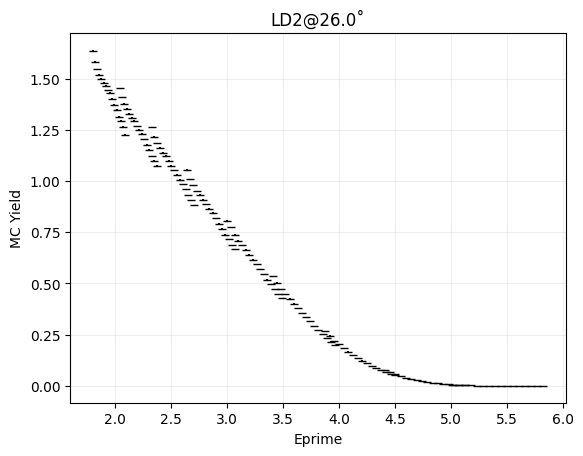

In [41]:
fig4, ax4 = plt.subplots()
ax4.errorbar(binned_eprime_bin_centers_1p95, bin_counts_eprime_1p95_dtg, yerr = bin_errors_eprime_1p95_dtg, fmt = '_', color = 'black', label = 'Sim 1.95 GeV')
ax4.errorbar(binned_eprime_bin_centers_2p21, bin_counts_eprime_2p21_dtg, yerr = bin_errors_eprime_2p21_dtg, fmt = '_', color = 'black', label = 'Sim 2.21 GeV')
ax4.errorbar(binned_eprime_bin_centers_2p52, bin_counts_eprime_2p52_dtg, yerr = bin_errors_eprime_2p52_dtg, fmt = '_', color = 'black', label = 'Sim 2.52 GeV')
ax4.errorbar(binned_eprime_bin_centers_2p86, bin_counts_eprime_2p86_dtg, yerr = bin_errors_eprime_2p86_dtg, fmt = '_', color = 'black', label = 'Sim 2.86 GeV')
ax4.errorbar(binned_eprime_bin_centers_3p25, bin_counts_eprime_3p25_dtg, yerr = bin_errors_eprime_3p25_dtg, fmt = '_', color = 'black', label = 'Sim 3.25 GeV')
ax4.errorbar(binned_eprime_bin_centers_3p69, bin_counts_eprime_3p69_dtg, yerr = bin_errors_eprime_3p69_dtg, fmt = '_', color = 'black', label = 'Sim 3.69 GeV')
ax4.errorbar(binned_eprime_bin_centers_4p19, bin_counts_eprime_4p19_dtg, yerr = bin_errors_eprime_4p19_dtg, fmt = '_', color = 'black', label = 'Sim 4.19 GeV')
ax4.errorbar(binned_eprime_bin_centers_4p767, bin_counts_eprime_4p767_dtg, yerr = bin_errors_eprime_4p767_dtg, fmt = '_', color = 'black', label = 'Sim 4.767 GeV')
ax4.errorbar(binned_eprime_bin_centers_5p42, bin_counts_eprime_5p42_dtg, yerr = bin_errors_eprime_5p42_dtg, fmt = '_', color = 'black', label = 'Sim 5.42 GeV')
ax4.grid(alpha = 0.2)
ax4.set_xlabel('Eprime')
ax4.set_ylabel('MC Yield')
# ax4.set_yscale('log')
# ax4.legend() 
ax4.set_title(f'{dtg}@{dang}˚')
# fig4.savefig(f'{folder}/eprime_{dtg}_{dang}_{start_time:.0f}.pdf')

<h1 align="center">DATA/SIMULATION YIELD RATIO FOR DTG</h1>

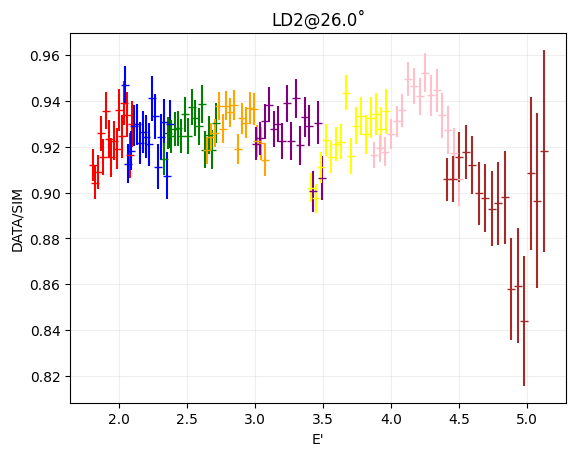

In [47]:
# Calculating the ratio of data to simulation and associated errors for each momentum value
ratio_eprime_1p95_dtg = subtracted_bin_contents_1p95_dtg / bin_counts_eprime_1p95_dtg
ratio_eprime_2p21_dtg = subtracted_bin_contents_2p21_dtg / bin_counts_eprime_2p21_dtg
ratio_eprime_2p52_dtg = subtracted_bin_contents_2p52_dtg / bin_counts_eprime_2p52_dtg
ratio_eprime_2p86_dtg = subtracted_bin_contents_2p86_dtg / bin_counts_eprime_2p86_dtg
ratio_eprime_3p25_dtg = subtracted_bin_contents_3p25_dtg / bin_counts_eprime_3p25_dtg
ratio_eprime_3p69_dtg = subtracted_bin_contents_3p69_dtg / bin_counts_eprime_3p69_dtg
ratio_eprime_4p19_dtg = subtracted_bin_contents_4p19_dtg / bin_counts_eprime_4p19_dtg
ratio_eprime_4p767_dtg = subtracted_bin_contents_4p767_dtg / bin_counts_eprime_4p767_dtg
# ratio_eprime_5p42_dtg = subtracted_bin_contents_5p42_dtg / bin_counts_eprime_5p42_dtg

# Add errors in quadrature for each momentum value
ratio_errors_1p95_dtg = ratio_eprime_1p95_dtg * np.sqrt((subtracted_bin_errors_1p95_dtg / subtracted_bin_contents_1p95_dtg)**2 + (bin_errors_eprime_1p95_dtg / bin_counts_eprime_1p95_dtg)**2)
ratio_errors_2p21_dtg = ratio_eprime_2p21_dtg * np.sqrt((subtracted_bin_errors_2p21_dtg / subtracted_bin_contents_2p21_dtg)**2 + (bin_errors_eprime_2p21_dtg / bin_counts_eprime_2p21_dtg)**2)
ratio_errors_2p52_dtg = ratio_eprime_2p52_dtg * np.sqrt((subtracted_bin_errors_2p52_dtg / subtracted_bin_contents_2p52_dtg)**2 + (bin_errors_eprime_2p52_dtg / bin_counts_eprime_2p52_dtg)**2)
ratio_errors_2p86_dtg = ratio_eprime_2p86_dtg * np.sqrt((subtracted_bin_errors_2p86_dtg / subtracted_bin_contents_2p86_dtg)**2 + (bin_errors_eprime_2p86_dtg / bin_counts_eprime_2p86_dtg)**2)
ratio_errors_3p25_dtg = ratio_eprime_3p25_dtg * np.sqrt((subtracted_bin_errors_3p25_dtg / subtracted_bin_contents_3p25_dtg)**2 + (bin_errors_eprime_3p25_dtg / bin_counts_eprime_3p25_dtg)**2)
ratio_errors_3p69_dtg = ratio_eprime_3p69_dtg * np.sqrt((subtracted_bin_errors_3p69_dtg / subtracted_bin_contents_3p69_dtg)**2 + (bin_errors_eprime_3p69_dtg / bin_counts_eprime_3p69_dtg)**2)
ratio_errors_4p19_dtg = ratio_eprime_4p19_dtg * np.sqrt((subtracted_bin_errors_4p19_dtg / subtracted_bin_contents_4p19_dtg)**2 + (bin_errors_eprime_4p19_dtg / bin_counts_eprime_4p19_dtg)**2)
ratio_errors_4p767_dtg = ratio_eprime_4p767_dtg * np.sqrt((subtracted_bin_errors_4p767_dtg / subtracted_bin_contents_4p767_dtg)**2 + (bin_errors_eprime_4p767_dtg / bin_counts_eprime_4p767_dtg)**2)
# ratio_errors_5p42_dtg = ratio_eprime_5p42_dtg * np.sqrt((subtracted_bin_errors_5p42_dtg / subtracted_bin_contents_5p42_dtg)**2 + (bin_errors_eprime_5p42_dtg / bin_counts_eprime_5p42_dtg)**2)

# Plotting the ratio with error bars for the updated momentum values
fig5, ax5 = plt.subplots()
ax5.errorbar(binned_eprime_bin_centers_1p95, ratio_eprime_1p95_dtg, yerr = ratio_errors_1p95_dtg, fmt = '_', color = 'red', label = '1.95 GeV')
ax5.errorbar(binned_eprime_bin_centers_2p21, ratio_eprime_2p21_dtg, yerr = ratio_errors_2p21_dtg, fmt = '_', color = 'blue', label = '2.21 GeV')
ax5.errorbar(binned_eprime_bin_centers_2p52, ratio_eprime_2p52_dtg, yerr = ratio_errors_2p52_dtg, fmt = '_', color = 'green', label = '2.52 GeV')
ax5.errorbar(binned_eprime_bin_centers_2p86, ratio_eprime_2p86_dtg, yerr = ratio_errors_2p86_dtg, fmt = '_', color = 'orange', label = '2.86 GeV')
ax5.errorbar(binned_eprime_bin_centers_3p25, ratio_eprime_3p25_dtg, yerr = ratio_errors_3p25_dtg, fmt = '_', color = 'purple', label = '3.25 GeV')
ax5.errorbar(binned_eprime_bin_centers_3p69, ratio_eprime_3p69_dtg, yerr = ratio_errors_3p69_dtg, fmt = '_', color = 'yellow', label = '3.69 GeV')
ax5.errorbar(binned_eprime_bin_centers_4p19, ratio_eprime_4p19_dtg, yerr = ratio_errors_4p19_dtg, fmt = '_', color = 'pink', label = '4.19 GeV')
ax5.errorbar(binned_eprime_bin_centers_4p767, ratio_eprime_4p767_dtg, yerr = ratio_errors_4p767_dtg, fmt = '_', color = 'brown', label = '4.767 GeV')
# ax5.errorbar(binned_eprime_bin_centers_5p42, ratio_eprime_5p42_dtg, yerr = ratio_errors_5p42_dtg, fmt = '_', color = 'cyan', label = '5.42 GeV')
ax5.set_xlabel('E\'')
ax5.set_ylabel('DATA/SIM')
ax5.set_title(f'{dtg}@{dang}˚')
# ax5.set_ylim(0.9, 1.1)
ax5.grid(alpha = 0.2)
# fig5.savefig(f'{folder}/ratio_eprime_{dtg}_{dang}_{start_time:.0f}.pdf')

<h1 align="center">BORN CROSS SECTION CALCULATION FOR DTG</h1>

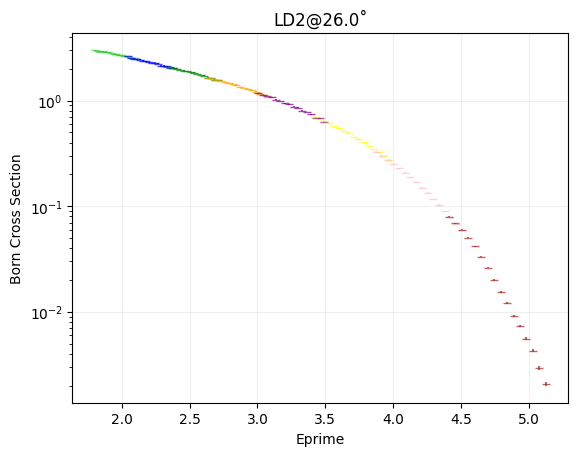

In [48]:
# Interpolate again to get model Born cross-section
born_xsec_array_1p95_dtg = griddata(points_dtg, V6, points_to_interpolate_1p95, method = 'linear')
born_xsec_array_2p21_dtg = griddata(points_dtg, V6, points_to_interpolate_2p21, method = 'linear')
born_xsec_array_2p52_dtg = griddata(points_dtg, V6, points_to_interpolate_2p52, method = 'linear')
born_xsec_array_2p86_dtg = griddata(points_dtg, V6, points_to_interpolate_2p86, method = 'linear')
born_xsec_array_3p25_dtg = griddata(points_dtg, V6, points_to_interpolate_3p25, method = 'linear')
born_xsec_array_3p69_dtg = griddata(points_dtg, V6, points_to_interpolate_3p69, method = 'linear')
born_xsec_array_4p19_dtg = griddata(points_dtg, V6, points_to_interpolate_4p19, method = 'linear')
born_xsec_array_4p767_dtg = griddata(points_dtg, V6, points_to_interpolate_4p767, method = 'linear')
born_xsec_array_5p42_dtg = griddata(points_dtg, V6, points_to_interpolate_5p42, method = 'linear')

# Get the QE piece
qe_array_1p95_dtg = griddata(points_dtg, V8, points_to_interpolate_1p95, method = 'linear')
qe_array_2p21_dtg = griddata(points_dtg, V8, points_to_interpolate_2p21, method = 'linear')
qe_array_2p52_dtg = griddata(points_dtg, V8, points_to_interpolate_2p52, method = 'linear')
qe_array_2p86_dtg = griddata(points_dtg, V8, points_to_interpolate_2p86, method = 'linear')
qe_array_3p25_dtg = griddata(points_dtg, V8, points_to_interpolate_3p25, method = 'linear')
qe_array_3p69_dtg = griddata(points_dtg, V8, points_to_interpolate_3p69, method = 'linear')
qe_array_4p19_dtg = griddata(points_dtg, V8, points_to_interpolate_4p19, method = 'linear')
qe_array_4p767_dtg = griddata(points_dtg, V8, points_to_interpolate_4p767, method = 'linear')
qe_array_5p42_dtg = griddata(points_dtg, V8, points_to_interpolate_5p42, method = 'linear')

# Interpolate 3rd time to get Coulomb correction factor
ccf_1p95_dtg = griddata(points_dtg, V13, points_to_interpolate_1p95, method = 'linear')
ccf_2p21_dtg = griddata(points_dtg, V13, points_to_interpolate_2p21, method = 'linear')
ccf_2p52_dtg = griddata(points_dtg, V13, points_to_interpolate_2p52, method = 'linear')
ccf_2p86_dtg = griddata(points_dtg, V13, points_to_interpolate_2p86, method = 'linear')
ccf_3p25_dtg = griddata(points_dtg, V13, points_to_interpolate_3p25, method = 'linear')
ccf_3p69_dtg = griddata(points_dtg, V13, points_to_interpolate_3p69, method = 'linear')
ccf_4p19_dtg = griddata(points_dtg, V13, points_to_interpolate_4p19, method = 'linear')
ccf_4p767_dtg = griddata(points_dtg, V13, points_to_interpolate_4p767, method = 'linear')
# ccf_5p42_dtg = griddata(points_dtg, V13, points_to_interpolate_5p42, method = 'linear')

# Calculate the data Born cross-section and apply Coulomb corrections
born_cross_1p95_dtg = ratio_eprime_1p95_dtg * born_xsec_array_1p95_dtg * ccf_1p95_dtg
born_cross_2p21_dtg = ratio_eprime_2p21_dtg * born_xsec_array_2p21_dtg * ccf_2p21_dtg
born_cross_2p52_dtg = ratio_eprime_2p52_dtg * born_xsec_array_2p52_dtg * ccf_2p52_dtg
born_cross_2p86_dtg = ratio_eprime_2p86_dtg * born_xsec_array_2p86_dtg * ccf_2p86_dtg
born_cross_3p25_dtg = ratio_eprime_3p25_dtg * born_xsec_array_3p25_dtg * ccf_3p25_dtg
born_cross_3p69_dtg = ratio_eprime_3p69_dtg * born_xsec_array_3p69_dtg * ccf_3p69_dtg
born_cross_4p19_dtg = ratio_eprime_4p19_dtg * born_xsec_array_4p19_dtg * ccf_4p19_dtg
born_cross_4p767_dtg = ratio_eprime_4p767_dtg * born_xsec_array_4p767_dtg * ccf_4p767_dtg
# born_cross_5p42_dtg = ratio_eprime_5p42_dtg * born_xsec_array_5p42_dtg * ccf_5p42_dtg

# Error propagation
born_errors_1p95_dtg = born_cross_1p95_dtg * ratio_errors_1p95_dtg
born_errors_2p21_dtg = born_cross_2p21_dtg * ratio_errors_2p21_dtg
born_errors_2p52_dtg = born_cross_2p52_dtg * ratio_errors_2p52_dtg
born_errors_2p86_dtg = born_cross_2p86_dtg * ratio_errors_2p86_dtg
born_errors_3p25_dtg = born_cross_3p25_dtg * ratio_errors_3p25_dtg
born_errors_3p69_dtg = born_cross_3p69_dtg * ratio_errors_3p69_dtg
born_errors_4p19_dtg = born_cross_4p19_dtg * ratio_errors_4p19_dtg
born_errors_4p767_dtg = born_cross_4p767_dtg * ratio_errors_4p767_dtg
# born_errors_5p42_dtg = born_cross_5p42_dtg * ratio_errors_5p42_dtg

# Plotting the results
fig6, ax6 = plt.subplots()
ax6.errorbar(binned_eprime_bin_centers_1p95, born_cross_1p95_dtg, yerr=born_errors_1p95_dtg, fmt='_', alpha=0.7, color='limegreen', label='1.95 GeV')
ax6.errorbar(binned_eprime_bin_centers_2p21, born_cross_2p21_dtg, yerr=born_errors_2p21_dtg, fmt='_', alpha=0.7, color='blue', label='2.21 GeV')
ax6.errorbar(binned_eprime_bin_centers_2p52, born_cross_2p52_dtg, yerr=born_errors_2p52_dtg, fmt='_', alpha=0.7, color='green', label='2.52 GeV')
ax6.errorbar(binned_eprime_bin_centers_2p86, born_cross_2p86_dtg, yerr=born_errors_2p86_dtg, fmt='_', alpha=0.7, color='orange', label='2.86 GeV')
ax6.errorbar(binned_eprime_bin_centers_3p25, born_cross_3p25_dtg, yerr=born_errors_3p25_dtg, fmt='_', alpha=0.7, color='purple', label='3.25 GeV')
ax6.errorbar(binned_eprime_bin_centers_3p69, born_cross_3p69_dtg, yerr=born_errors_3p69_dtg, fmt='_', alpha=0.7, color='yellow', label='3.69 GeV')
ax6.errorbar(binned_eprime_bin_centers_4p19, born_cross_4p19_dtg, yerr=born_errors_4p19_dtg, fmt='_', alpha=0.7, color='pink', label='4.19 GeV')
ax6.errorbar(binned_eprime_bin_centers_4p767, born_cross_4p767_dtg, yerr=born_errors_4p767_dtg, fmt='_', alpha=0.7, color='brown', label='4.767 GeV')
# ax6.errorbar(binned_eprime_bin_centers_5p42, born_cross_5p42_dtg, yerr=born_errors_5p42_dtg, fmt='_', alpha=0.7, color='cyan', label='5.42 GeV')
ax6.set_xlabel('Eprime')
ax6.set_ylabel('Born Cross Section')
ax6.set_title(f'{dtg}@{dang}˚')
ax6.set_yscale('log')
#ax6.legend()
ax6.grid(alpha = 0.2)
# fig6.savefig(f'{folder}/xsec_{dtg}_{dang}_{start_time:.0f}.pdf')

<h1 align="center">TAKING CROSS-SECTION RATIOS</h1>

Per-nucleon scaling factor: 6.0
slope 0.4487155418276409


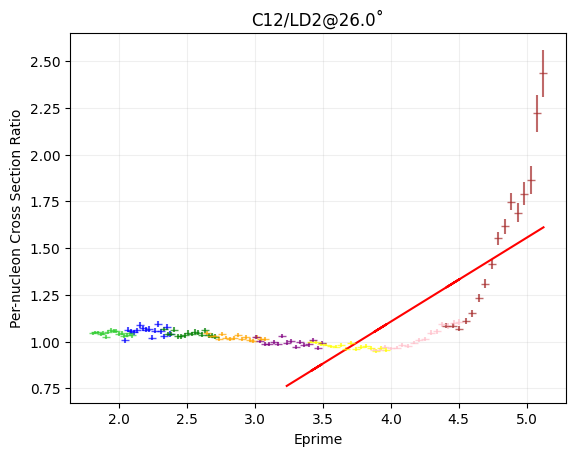

In [50]:
nA = target_info[ntg][1]
nZ = target_info[ntg][0]
dA = target_info[dtg][1]

sf = nA/dA
print("Per-nucleon scaling factor:", sf)

csr_1p95 = born_cross_1p95_ntg / born_cross_1p95_dtg / sf
csr_2p21 = born_cross_2p21_ntg / born_cross_2p21_dtg / sf
csr_2p52 = born_cross_2p52_ntg / born_cross_2p52_dtg / sf
csr_2p86 = born_cross_2p86_ntg / born_cross_2p86_dtg / sf
csr_3p25 = born_cross_3p25_ntg / born_cross_3p25_dtg / sf
csr_3p69 = born_cross_3p69_ntg / born_cross_3p69_dtg / sf
csr_4p19 = born_cross_4p19_ntg / born_cross_4p19_dtg / sf
csr_4p767 = born_cross_4p767_ntg / born_cross_4p767_dtg / sf
# csr_5p42 = born_cross_5p42_ntg / born_cross_5p42_dtg / sf

csr_errors_1p95 = csr_1p95 * np.sqrt((born_errors_1p95_ntg / born_cross_1p95_ntg)**2 + (born_errors_1p95_dtg / born_cross_1p95_dtg)**2)
csr_errors_2p21 = csr_2p21 * np.sqrt((born_errors_2p21_ntg / born_cross_2p21_ntg)**2 + (born_errors_2p21_dtg / born_cross_2p21_dtg)**2)
csr_errors_2p52 = csr_2p52 * np.sqrt((born_errors_2p52_ntg / born_cross_2p52_ntg)**2 + (born_errors_2p52_dtg / born_cross_2p52_dtg)**2)
csr_errors_2p86 = csr_2p86 * np.sqrt((born_errors_2p86_ntg / born_cross_2p86_ntg)**2 + (born_errors_2p86_dtg / born_cross_2p86_dtg)**2)
csr_errors_3p25 = csr_3p25 * np.sqrt((born_errors_3p25_ntg / born_cross_3p25_ntg)**2 + (born_errors_3p25_dtg / born_cross_3p25_dtg)**2)
csr_errors_3p69 = csr_3p69 * np.sqrt((born_errors_3p69_ntg / born_cross_3p69_ntg)**2 + (born_errors_3p69_dtg / born_cross_3p69_dtg)**2)
csr_errors_4p19 = csr_4p19 * np.sqrt((born_errors_4p19_ntg / born_cross_4p19_ntg)**2 + (born_errors_4p19_dtg / born_cross_4p19_dtg)**2)
csr_errors_4p767 = csr_4p767 * np.sqrt((born_errors_4p767_ntg / born_cross_4p767_ntg)**2 + (born_errors_4p767_dtg / born_cross_4p767_dtg)**2)
# csr_errors_5p42 = csr_5p42 * np.sqrt((born_errors_5p42_ntg / born_cross_5p42_ntg)**2 + (born_errors_5p42_dtg / born_cross_5p42_dtg)**2)

fig7, ax7 = plt.subplots()
ax7.errorbar(binned_eprime_bin_centers_1p95, csr_1p95, yerr=csr_errors_1p95, fmt='_', alpha=0.7, color='limegreen', label='1.95 GeV')
ax7.errorbar(binned_eprime_bin_centers_2p21, csr_2p21, yerr=csr_errors_2p21, fmt='_', alpha=0.7, color='blue', label='2.21 GeV')
ax7.errorbar(binned_eprime_bin_centers_2p52, csr_2p52, yerr=csr_errors_2p52, fmt='_', alpha=0.7, color='green', label='2.52 GeV')
ax7.errorbar(binned_eprime_bin_centers_2p86, csr_2p86, yerr=csr_errors_2p86, fmt='_', alpha=0.7, color='orange', label='2.86 GeV')
ax7.errorbar(binned_eprime_bin_centers_3p25, csr_3p25, yerr=csr_errors_3p25, fmt='_', alpha=0.7, color='purple', label='3.25 GeV')
ax7.errorbar(binned_eprime_bin_centers_3p69, csr_3p69, yerr=csr_errors_3p69, fmt='_', alpha=0.7, color='yellow', label='3.69 GeV')
ax7.errorbar(binned_eprime_bin_centers_4p19, csr_4p19, yerr=csr_errors_4p19, fmt='_', alpha=0.7, color='pink', label='4.19 GeV')
ax7.errorbar(binned_eprime_bin_centers_4p767, csr_4p767, yerr=csr_errors_4p767, fmt='_', alpha=0.7, color='brown', label='4.767 GeV')
# ax7.errorbar(binned_eprime_bin_centers_5p42, csr_5p42, yerr=csr_errors_5p42, fmt='_', alpha=0.7, color='cyan', label='5.42 GeV')

ax7.set_xlabel('Eprime')
ax7.set_ylabel('Per-nucleon Cross Section Ratio')
ax7.set_title(f'{ntg}/{dtg}@{dang}˚')
ax7.grid(alpha=0.2)

csr = np.concatenate((csr_1p95, csr_2p21, csr_2p52, csr_2p86, csr_3p25, csr_3p69, csr_4p19, csr_4p767))
bin_centers = np.concatenate((binned_eprime_bin_centers_1p95, binned_eprime_bin_centers_2p21, binned_eprime_bin_centers_2p52, binned_eprime_bin_centers_2p86, binned_eprime_bin_centers_3p25, binned_eprime_bin_centers_3p69, binned_eprime_bin_centers_4p19, binned_eprime_bin_centers_4p767))
mask = (bin_centers >= 3.23) & (bin_centers <= 5.36) & ~np.isnan(csr)
filtered_csr = csr[mask]
filtered_bin_centers = bin_centers[mask]

slope, intercept, r_value, p_value, std_err = stats.linregress(filtered_bin_centers, filtered_csr)
print("slope", slope)
# print("high point", slope * np.max(filtered_bin_centers) + intercept)
# print("low point", slope * np.min(filtered_bin_centers) + intercept)
ax7.plot(filtered_bin_centers, slope * filtered_bin_centers + intercept, 'r')
# fig7.savefig(f'{folder}/csr_{ntg}_{dtg}_{dang}_{start_time:.0f}.pdf')

<h1 align="center">Converting to Bjorken-x</h1>

absolute value of slope 0.2843474427787253
EMC Ratio at x = 0.3: 1.056443216454312


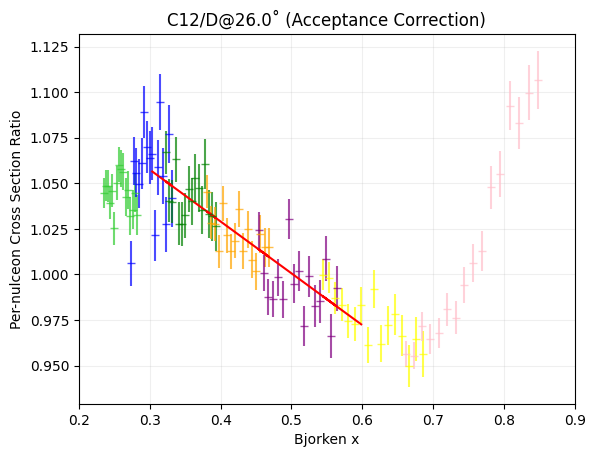

In [53]:
# Calculate Bjorken-x bin centers for each momentum
bin_centers_bjx_1p95 = (4 * Ei * binned_eprime_bin_centers_1p95 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_1p95))
bin_centers_bjx_2p21 = (4 * Ei * binned_eprime_bin_centers_2p21 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_2p21))
bin_centers_bjx_2p52 = (4 * Ei * binned_eprime_bin_centers_2p52 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_2p52))
bin_centers_bjx_2p86 = (4 * Ei * binned_eprime_bin_centers_2p86 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_2p86))
bin_centers_bjx_3p25 = (4 * Ei * binned_eprime_bin_centers_3p25 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_3p25))
bin_centers_bjx_3p69 = (4 * Ei * binned_eprime_bin_centers_3p69 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_3p69))
bin_centers_bjx_4p19 = (4 * Ei * binned_eprime_bin_centers_4p19 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_4p19))
bin_centers_bjx_4p767 = (4 * Ei * binned_eprime_bin_centers_4p767 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_4p767))
# bin_centers_bjx_5p42 = (4 * Ei * binned_eprime_bin_centers_5p42 * np.sin(dang * np.pi / 180 / 2)**2) / (2 * Mp * (Ei - binned_eprime_bin_centers_5p42))

# Plotting the cross-section ratios as a function of Bjorken-x
fig8, ax8 = plt.subplots()
ax8.errorbar(bin_centers_bjx_1p95, csr_1p95, yerr=csr_errors_1p95, fmt='_', alpha=0.7, color='limegreen', label='1.95 GeV')
ax8.errorbar(bin_centers_bjx_2p21, csr_2p21, yerr=csr_errors_2p21, fmt='_', alpha=0.7, color='blue', label='2.21 GeV')
ax8.errorbar(bin_centers_bjx_2p52, csr_2p52, yerr=csr_errors_2p52, fmt='_', alpha=0.7, color='green', label='2.52 GeV')
ax8.errorbar(bin_centers_bjx_2p86, csr_2p86, yerr=csr_errors_2p86, fmt='_', alpha=0.7, color='orange', label='2.86 GeV')
ax8.errorbar(bin_centers_bjx_3p25, csr_3p25, yerr=csr_errors_3p25, fmt='_', alpha=0.7, color='purple', label='3.25 GeV')
ax8.errorbar(bin_centers_bjx_3p69, csr_3p69, yerr=csr_errors_3p69, fmt='_', alpha=0.7, color='yellow', label='3.69 GeV')
ax8.errorbar(bin_centers_bjx_4p19, csr_4p19, yerr=csr_errors_4p19, fmt='_', alpha=0.7, color='pink', label='4.19 GeV')
# ax8.errorbar(bin_centers_bjx_4p767, csr_4p767, yerr=csr_errors_4p767, fmt='_', alpha=0.7, color='brown', label='4.767 GeV')
# ax8.errorbar(bin_centers_bjx_5p42, csr_5p42, yerr=csr_errors_5p42, fmt='_', alpha=0.7, color='cyan', label='5.42 GeV')
ax8.set_xlabel('Bjorken x')
ax8.set_ylabel('Per-nulceon Cross Section Ratio')
ax8.set_title(f'{ntg}/D@{idang}˚ (Acceptance Correction)')
# ax8.set_ylim(0.75, 1.1)
ax8.set_xlim(0.2, 0.9)
ax8.grid(alpha = 0.2)

# Concatenate Bjorken-x bin centers for the updated momentum values
bjx_bin_centers = np.concatenate((
    bin_centers_bjx_1p95, 
    bin_centers_bjx_2p21, 
    bin_centers_bjx_2p52, 
    bin_centers_bjx_2p86, 
    bin_centers_bjx_3p25, 
    bin_centers_bjx_3p69, 
    bin_centers_bjx_4p19, 
    bin_centers_bjx_4p767
))
mask = (bjx_bin_centers >= 0.3) & (bjx_bin_centers <= 0.6) & ~np.isnan(csr)
filtered_bin_centers = bjx_bin_centers[mask]
filtered_csr = csr[mask]

slope, intercept, r_value, p_value, std_err = stats.linregress(filtered_bin_centers, filtered_csr)
print("absolute value of slope", abs(slope))
print("EMC Ratio at x = 0.3:", slope * np.min(filtered_bin_centers) + intercept)
_  = ax8.plot(filtered_bin_centers, slope * filtered_bin_centers + intercept, 'r')
# fig8.savefig(f'{folder}/emc_{ntg}_{dtg}_{dang}_{start_time:.0f}.pdf')

# Calculating isoscalar correction factor

In [54]:
# Concatenate E' bin centers for the updated momentum values
all_eprime_bin_centers = np.concatenate((
    binned_eprime_bin_centers_1p95, 
    binned_eprime_bin_centers_2p21, 
    binned_eprime_bin_centers_2p52, 
    binned_eprime_bin_centers_2p86, 
    binned_eprime_bin_centers_3p25, 
    binned_eprime_bin_centers_3p69, 
    binned_eprime_bin_centers_4p19, 
    binned_eprime_bin_centers_4p767
))

# Concatenate Bjorken-x bin centers for the updated momentum values
all_bjx = np.concatenate((
    bin_centers_bjx_1p95, 
    bin_centers_bjx_2p21, 
    bin_centers_bjx_2p52, 
    bin_centers_bjx_2p86, 
    bin_centers_bjx_3p25, 
    bin_centers_bjx_3p69, 
    bin_centers_bjx_4p19, 
    bin_centers_bjx_4p767
))

isoscalar_all = np.zeros(len(all_eprime_bin_centers))
q2_all = 4 * Ei * all_eprime_bin_centers * (np.sin(dang * np.pi / 180 / 2))**2
print(f"The minimum and maximum Q^2 values are {np.min(q2_all):.2f} and {np.max(q2_all):.2f}")

for i in range(len(all_eprime_bin_centers)):
    isoscalar_all[i] = jra_nprat(all_bjx[i], q2_all[i])

print("Average of q2_all", np.mean(q2_all))
print("Average of Bjorken x", np.mean(all_bjx))
print("Length and average of isoscalar_all", len(isoscalar_all), np.mean(isoscalar_all))
# print(isoscalar_all)
# print("csr_2p42", csr_2p42)

The minimum and maximum Q^2 values are 3.85 and 10.93
Average of q2_all 6.783480349699116
Average of Bjorken x 0.5195369605470871
Length and average of isoscalar_all 128 0.5420098314765378


\begin{equation}
    \text{isoscalar all} = \frac{\sigma_n}{\sigma_p}
\end{equation}

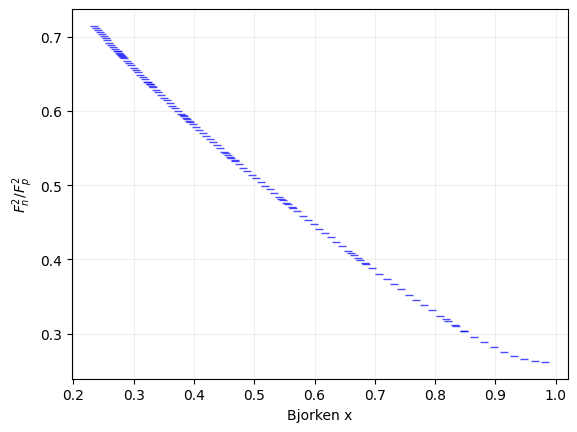

In [55]:
a = plt.plot(all_bjx[isoscalar_all != 1], isoscalar_all[isoscalar_all != 1], '_', alpha = 0.7, color = 'blue')
plt.xlabel('Bjorken x')
plt.ylabel(r'$F^2_n/F^2_p$')
plt.grid(alpha = 0.2)

# Calculating and Plotting the final Cross-Section Ratios

\begin{equation}
    \left( \frac{\sigma_A}{\sigma_D} \right)_{\text{ISO}} = \frac{A}{2} \left( \frac{1 + \frac{\sigma_n}{\sigma_p}}{Z + N \frac{\sigma_n}{\sigma_p}} \right) \frac{\sigma_A}{\sigma_D},
\end{equation}

\begin{equation}
    \text{isoscalar factor} = \frac{A}{2} \left( \frac{1 + \frac{\sigma_n}{\sigma_p}}{Z + N \frac{\sigma_n}{\sigma_p}} \right)
\end{equation}

nN 6
nZ 6
nA 12
Mean of isoscalar_factor: 1.0


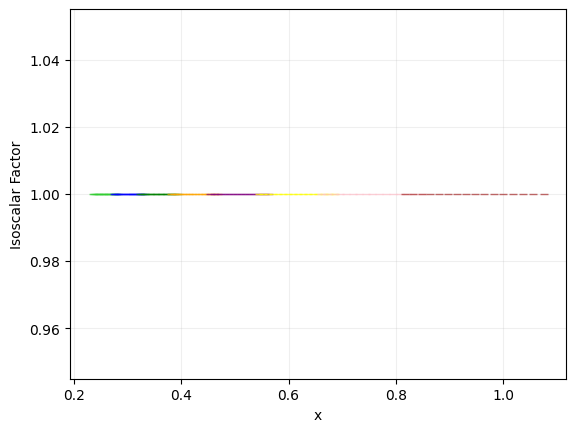

In [57]:
nN = nA - nZ
print("nN", nN)
print("nZ", nZ)
print("nA", nA)

isoscalar_factor = (nA/2 * (1 + isoscalar_all))/(nZ + (nN * isoscalar_all))
# Adjust the slicing of isoscalar_factor according to the new dmom values
isoscalar_factor_1p95 = isoscalar_factor[0:len(binned_eprime_bin_centers_1p95)]
isoscalar_factor_2p21 = isoscalar_factor[len(binned_eprime_bin_centers_1p95):2 * len(binned_eprime_bin_centers_2p21)]
isoscalar_factor_2p52 = isoscalar_factor[2 * len(binned_eprime_bin_centers_2p21):3 * len(binned_eprime_bin_centers_2p52)]
isoscalar_factor_2p86 = isoscalar_factor[3 * len(binned_eprime_bin_centers_2p52):4 * len(binned_eprime_bin_centers_2p86)]
isoscalar_factor_3p25 = isoscalar_factor[4 * len(binned_eprime_bin_centers_2p86):5 * len(binned_eprime_bin_centers_3p25)]
isoscalar_factor_3p69 = isoscalar_factor[5 * len(binned_eprime_bin_centers_3p25):6 * len(binned_eprime_bin_centers_3p69)]
isoscalar_factor_4p19 = isoscalar_factor[6 * len(binned_eprime_bin_centers_3p69):7 * len(binned_eprime_bin_centers_4p19)]
isoscalar_factor_4p767 = isoscalar_factor[7 * len(binned_eprime_bin_centers_4p19):8 * len(binned_eprime_bin_centers_4p767)]
isoscalar_factor_5p42 = isoscalar_factor[8 * len(binned_eprime_bin_centers_4p767):9 * len(binned_eprime_bin_centers_5p42)]

# Print the mean of isoscalar_factor
print("Mean of isoscalar_factor:", np.mean(isoscalar_factor))

# Apply isoscalar correction to cross-section ratios for each momentum
iso_csr_1p95 = csr_1p95 * isoscalar_factor_1p95
iso_csr_2p21 = csr_2p21 * isoscalar_factor_2p21
iso_csr_2p52 = csr_2p52 * isoscalar_factor_2p52
iso_csr_2p86 = csr_2p86 * isoscalar_factor_2p86
iso_csr_3p25 = csr_3p25 * isoscalar_factor_3p25
iso_csr_3p69 = csr_3p69 * isoscalar_factor_3p69
iso_csr_4p19 = csr_4p19 * isoscalar_factor_4p19
iso_csr_4p767 = csr_4p767 * isoscalar_factor_4p767
# iso_csr_5p42 = csr_5p42 * isoscalar_factor_5p42

# Plotting the isoscalar correction factors
plt.plot(bin_centers_bjx_1p95, isoscalar_factor_1p95, '_', alpha=0.7, color='limegreen', label='1.95 GeV')
plt.plot(bin_centers_bjx_2p21, isoscalar_factor_2p21, '_', alpha=0.7, color='blue', label='2.21 GeV')
plt.plot(bin_centers_bjx_2p52, isoscalar_factor_2p52, '_', alpha=0.7, color='green', label='2.52 GeV')
plt.plot(bin_centers_bjx_2p86, isoscalar_factor_2p86, '_', alpha=0.7, color='orange', label='2.86 GeV')
plt.plot(bin_centers_bjx_3p25, isoscalar_factor_3p25, '_', alpha=0.7, color='purple', label='3.25 GeV')
plt.plot(bin_centers_bjx_3p69, isoscalar_factor_3p69, '_', alpha=0.7, color='yellow', label='3.69 GeV')
plt.plot(bin_centers_bjx_4p19, isoscalar_factor_4p19, '_', alpha=0.7, color='pink', label='4.19 GeV')
plt.plot(bin_centers_bjx_4p767, isoscalar_factor_4p767, '_', alpha=0.7, color='brown', label='4.767 GeV')
# plt.plot(bin_centers_bjx_5p42, isoscalar_factor_5p42, '_', alpha=0.7, color='cyan', label='5.42 GeV')
plt.grid(alpha = 0.2)
plt.xlabel('x')
_ = plt.ylabel('Isoscalar Factor')

Value of isoscalar corrected slope -0.2843474427787252


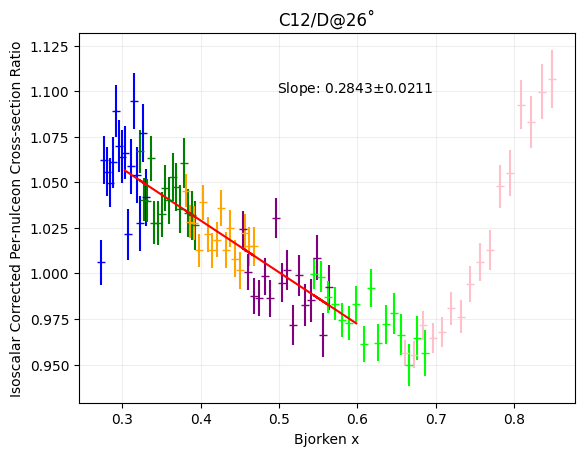

In [68]:
fig9, ax9 = plt.subplots()
# Updated plotting for new dmom values
# ax9.errorbar(bin_centers_bjx_1p95, iso_csr_1p95, yerr = isoscalar_factor_1p95 * csr_errors_1p95, fmt = '_', color = 'limegreen', label = '1.95 GeV')
ax9.errorbar(bin_centers_bjx_2p21, iso_csr_2p21, yerr = isoscalar_factor_2p21 * csr_errors_2p21, fmt = '_', color = 'blue', label = '2.21 GeV')
ax9.errorbar(bin_centers_bjx_2p52, iso_csr_2p52, yerr = isoscalar_factor_2p52 * csr_errors_2p52, fmt = '_', color = 'green', label = '2.52 GeV')
ax9.errorbar(bin_centers_bjx_2p86, iso_csr_2p86, yerr = isoscalar_factor_2p86 * csr_errors_2p86, fmt = '_', color = 'orange', label = '2.86 GeV')
ax9.errorbar(bin_centers_bjx_3p25, iso_csr_3p25, yerr = isoscalar_factor_3p25 * csr_errors_3p25, fmt = '_', color = 'purple', label = '3.25 GeV')
ax9.errorbar(bin_centers_bjx_3p69, iso_csr_3p69, yerr = isoscalar_factor_3p69 * csr_errors_3p69, fmt = '_', color = 'lime', label = '3.69 GeV')
ax9.errorbar(bin_centers_bjx_4p19, iso_csr_4p19, yerr = isoscalar_factor_4p19 * csr_errors_4p19, fmt = '_', color = 'pink', label = '4.19 GeV')
# ax9.errorbar(bin_centers_bjx_4p767, iso_csr_4p767, yerr = isoscalar_factor_4p767 * csr_errors_4p767, fmt = '_', alpha = 0.7, color = 'brown', label = '4.767 GeV')
# ax9.errorbar(bin_centers_bjx_5p42, iso_csr_5p42, yerr = isoscalar_factor_5p42 * csr_errors_5p42, fmt = '_', alpha = 0.7, color = 'cyan', label = '5.42 GeV')

ax9.set_xlabel('Bjorken x')
# ax9.set_ylabel(fr'$\sigma_{ntg}$/{nA}/$\sigma_D$/2@{dang}˚')
ax9.set_ylabel('Isoscalar Corrected Per-nulceon Cross-section Ratio')
ax9.set_title(f'{ntg}/D@{idang}˚')
ax9.grid(alpha = 0.2)
# ax9.legend()

# Concatenate cross-section ratios for all new dmom values
iso_csr = np.concatenate((iso_csr_1p95, iso_csr_2p21, iso_csr_2p52, iso_csr_2p86, iso_csr_3p25, iso_csr_3p69, iso_csr_4p19, iso_csr_4p767))
filtered_iso_csr = iso_csr[mask]

iso_slope, iso_intercept, iso_r_value, iso_p_value, iso_std_err = stats.linregress(filtered_bin_centers, filtered_iso_csr)
print("Value of isoscalar corrected slope", iso_slope)
norm_3 = iso_slope * np.min(filtered_bin_centers) + iso_intercept
# print("Error on slope", iso_std_err)
# print("EMC Ratio at x = 0.3:", norm_3)
ax9.plot(filtered_bin_centers, iso_slope * filtered_bin_centers + iso_intercept, 'r')
# ax9.set_ylim(0.6, 0.9)
# ax9.set_xlim(0.15, 1.0)
ax9.text(0.4, 0.79, f'Slope: {abs(iso_slope):.4f}$\pm${iso_std_err:.4f} \n', transform = ax9.transAxes)
fig9.savefig(f'{folder}/isoscalarcorrected_emc_{ntg}_{dang}_{start_time:.0f}.pdf')

In [ ]:
minutes = (time.time() - start_time) / 60
print(f"Time taken: {minutes:.2f} minutes")
baja()